# INICIO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from google.cloud import bigquery
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
project_id = "686172640179"  # Reemplaza "tu-id-de-proyecto" con el ID de tu proyecto de Google Cloud
client = bigquery.Client(project=project_id)

C:\Users\David Note\AppData\Roaming\Python\Python312\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


# bigquery-public-data.covid19_tracking

In [3]:
dataset_ref = client.dataset("covid19_tracking", project = "bigquery-public-data")
tables = list(client.list_tables(dataset_ref))
for table in tables:
    print(table.table_id)

city_level_cases_and_deaths
covid_racial_data_tracker
national_testing_and_outcomes
state_facility_level_long_term_care
state_level_aggregate_long_term_care
state_level_cumulative_long_term_care
state_level_current_outbreak_long_term_care
state_screenshots
state_testing_and_outcomes


In [4]:
table_ref = dataset_ref.table("covid_racial_data_tracker")
table = client.get_table(table_ref)
df = client.list_rows(table, max_results=5323).to_dataframe()

# Trabajo de recopilacion

## Auxiliares Nombres y Estados

In [5]:
nombres_estados = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'GU': 'Guam',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VI': 'Virgin Islands',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming',
    'AS': 'American Samoa',
    'MP': 'Northern Mariana Islands',
    'PR': 'Puerto Rico'
}

In [6]:
estados = df["state"].unique()
print(f"Hay {len(estados)} países distintos en el DataFrame:")
print(estados)

Hay 56 países distintos en el DataFrame:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'AS' 'MP' 'NY' 'PR' 'VI']


# Extracion de datos

In [7]:
estados_A = {}
estados_distintos = df["state"].unique()
estados_filtro = {}
fecha = {}
estados_filtro_diff = {}
for estado in estados_distintos:
    estados_A[estado] = df.loc[df["state"] == estado]
    estados_filtro[estado] = estados_A[estado][["date", "cases_white", "cases_black", "deaths_white", "deaths_black", "hosp_white", "hosp_black"]]
    estados_filtro[estado] = estados_filtro[estado].sort_values(by='date')
    estados_filtro_diff[estado] = estados_filtro[estado].diff()

In [8]:
estados

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'AS', 'MP', 'NY', 'PR',
       'VI'], dtype=object)

# Test de graficas

C:\Users\David Note\AppData\Local\Temp\ipykernel_1916\3951663873.py:46: RuntimeWarning: invalid value encountered in divide
  data_white_norm_c = data_white / total_cases * 100
C:\Users\David Note\AppData\Local\Temp\ipykernel_1916\3951663873.py:47: RuntimeWarning: invalid value encountered in divide
  data_black_norm_c = data_black / total_cases * 100


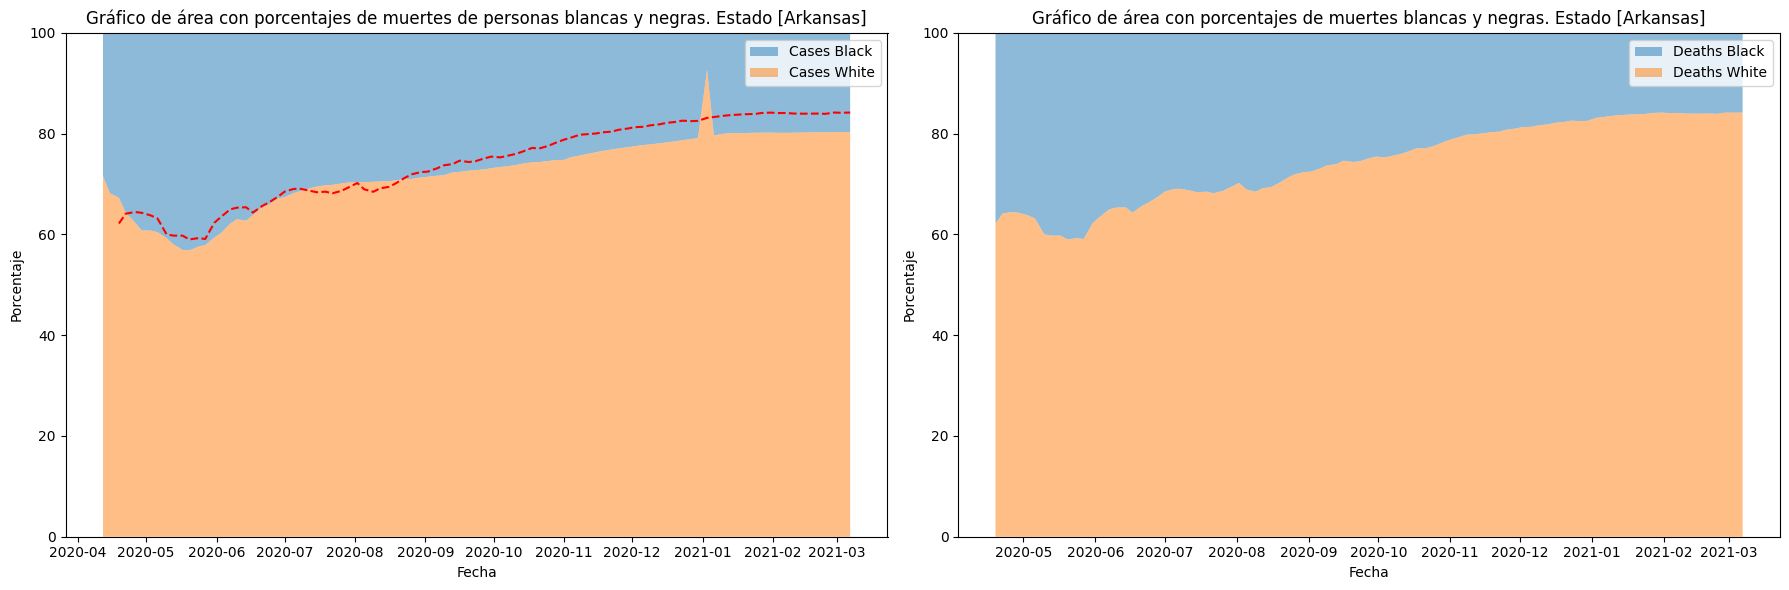

In [9]:
cual = estados[2]
plt.figure(figsize=(18, 6))

# Graficar casos blancos y negros
plt.subplot(1, 2, 1)

data_white = np.array(estados_filtro[cual]['cases_white'])
data_black = np.array(estados_filtro[cual]['cases_black'])
dates = np.arange(len(data_white))

data_white = pd.to_numeric(data_white, errors='coerce')
data_black = pd.to_numeric(data_black, errors='coerce')

data_white = np.nan_to_num(data_white, nan=0.0)
data_black = np.nan_to_num(data_black, nan=0.0)

total_cases = data_white + data_black
data_white_norm = data_white / total_cases * 100
data_black_norm = data_black / total_cases * 100

plt.fill_between(estados_filtro[cual]['date'], data_white_norm, 100, label='Cases Black', alpha=0.5)
plt.fill_between(estados_filtro[cual]['date'], 0, data_white_norm, label='Cases White', alpha=0.5)


plt.ylim(0, 100)
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Porcentaje')
titulo = f"Gráfico de área con porcentajes de muertes de personas blancas y negras. Estado [{nombres_estados.get( cual, 'Desconocido')}]"
plt.title(titulo)

# Graficar muertes blancas y negras
plt.subplot(1, 2, 2)

data_white = np.array(estados_filtro[cual]['deaths_white'])
data_black = np.array(estados_filtro[cual]['deaths_black'])
dates = np.arange(len(data_white))

data_white = pd.to_numeric(data_white, errors='coerce')
data_black = pd.to_numeric(data_black, errors='coerce')

data_white = np.nan_to_num(data_white, nan=0.0)
data_black = np.nan_to_num(data_black, nan=0.0)

total_cases = data_white + data_black
data_white_norm_c = data_white / total_cases * 100
data_black_norm_c = data_black / total_cases * 100


plt.fill_between(estados_filtro[cual]['date'], data_white_norm_c, 100, label='Deaths Black', alpha=0.5)
plt.fill_between(estados_filtro[cual]['date'], 0, data_white_norm_c, label='Deaths White', alpha=0.5)

plt.ylim(0, 100)
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Porcentaje')
titulo = f"Gráfico de área con porcentajes de muertes blancas y negras. Estado [{nombres_estados.get( cual, 'Desconocido')}]"
plt.title(titulo)

# Agregar una línea que una los dos gráficos
plt.subplot(1, 2, 1)
plt.plot(estados_filtro[cual]['date'], data_white_norm_c, color='red', linestyle='--', label='ss')


plt.tight_layout()
plt.show()

# Definicion de funcion de graficas

In [15]:
def grafica(numero):
  cual = estados[numero]
  data_white = np.array(estados_filtro[cual]['cases_white'])
  data_black = np.array(estados_filtro[cual]['cases_black'])
  dates = np.arange(len(data_white))

  data_white = pd.to_numeric(data_white, errors='coerce')
  data_black = pd.to_numeric(data_black, errors='coerce')

  data_white = np.nan_to_num(data_white, nan=0.0)
  data_black = np.nan_to_num(data_black, nan=0.0)

  total_cases = data_white + data_black
  data_white_norm = data_white / total_cases * 100
  data_black_norm = data_black / total_cases * 100

  data_white = np.array(estados_filtro[cual]['deaths_white'])
  data_black = np.array(estados_filtro[cual]['deaths_black'])
  dates = np.arange(len(data_white))

  data_white = pd.to_numeric(data_white, errors='coerce')
  data_black = pd.to_numeric(data_black, errors='coerce')

  data_white = np.nan_to_num(data_white, nan=0.0)
  data_black = np.nan_to_num(data_black, nan=0.0)

  total_cases = data_white + data_black
  data_white_norm_c = data_white / total_cases * 100
  data_black_norm_c = data_black / total_cases * 100


  plt.figure(figsize=(18, 6))

  plt.subplot(1, 2, 1)
  plt.fill_between(estados_filtro[cual]['date'], data_white_norm, 100, label='Cases Black', alpha=0.5)
  plt.fill_between(estados_filtro[cual]['date'], 0, data_white_norm, label='Cases White', alpha=0.5)
  plt.plot(estados_filtro[cual]['date'], data_white_norm_c, color='red', linestyle='--', label=f'Relacion: {str(mean_absolute_percentage_error(np.where(np.isnan(data_white_norm), np.nanmean(data_white_norm), data_white_norm),np.where(np.isnan(data_white_norm_c), np.nanmean(data_white_norm_c), data_white_norm_c))*100*np.sign(np.nanmean(data_white_norm_c)-np.nanmean(data_white_norm)))[:6]}%')
  #plt.plot(estados_filtro[cual]['date'], data_white_norm, color='red', linestyle='--')
  plt.ylim(0, 100)
  plt.legend()
  plt.xlabel('Fecha')
  plt.ylabel('Porcentaje')
  titulo = f"Gráfico de área con porcentajes de los casos de personas blancas y negras. Estado [{nombres_estados.get( cual, 'Desconocido')}]"
  plt.title(titulo)

  plt.subplot(1, 2, 2)
  plt.fill_between(estados_filtro[cual]['date'], data_white_norm_c, 100, label='Deaths Black', alpha=0.5)
  plt.fill_between(estados_filtro[cual]['date'], 0, data_white_norm_c, label='Deaths White', alpha=0.5)

  plt.ylim(0, 100)
  plt.legend()
  plt.xlabel('Fecha')
  plt.ylabel('Porcentaje')
  titulo = f"Gráfico de área con porcentajes de muertes de personas blancas y negras. Estado [{nombres_estados.get( cual, 'Desconocido')}]"
  plt.title(titulo)
  plt.tight_layout()
  #plt.savefig(f'Grafica Estado [{nombres_estados.get( cual, 'Desconocido')}].png')
  #plt.show()


# plots de todas las graficas [estados]

C:\Users\David Note\AppData\Local\Temp\ipykernel_1916\2722029752.py:14: RuntimeWarning: invalid value encountered in divide
  data_white_norm = data_white / total_cases * 100
C:\Users\David Note\AppData\Local\Temp\ipykernel_1916\2722029752.py:15: RuntimeWarning: invalid value encountered in divide
  data_black_norm = data_black / total_cases * 100
C:\Users\David Note\AppData\Local\Temp\ipykernel_1916\2722029752.py:28: RuntimeWarning: invalid value encountered in divide
  data_white_norm_c = data_white / total_cases * 100
C:\Users\David Note\AppData\Local\Temp\ipykernel_1916\2722029752.py:29: RuntimeWarning: invalid value encountered in divide
  data_black_norm_c = data_black / total_cases * 100
C:\Users\David Note\AppData\Local\Temp\ipykernel_1916\2722029752.py:28: RuntimeWarning: invalid value encountered in divide
  data_white_norm_c = data_white / total_cases * 100
C:\Users\David Note\AppData\Local\Temp\ipykernel_1916\2722029752.py:29: RuntimeWarning: invalid value encountered in di

ValueError: Input contains NaN.

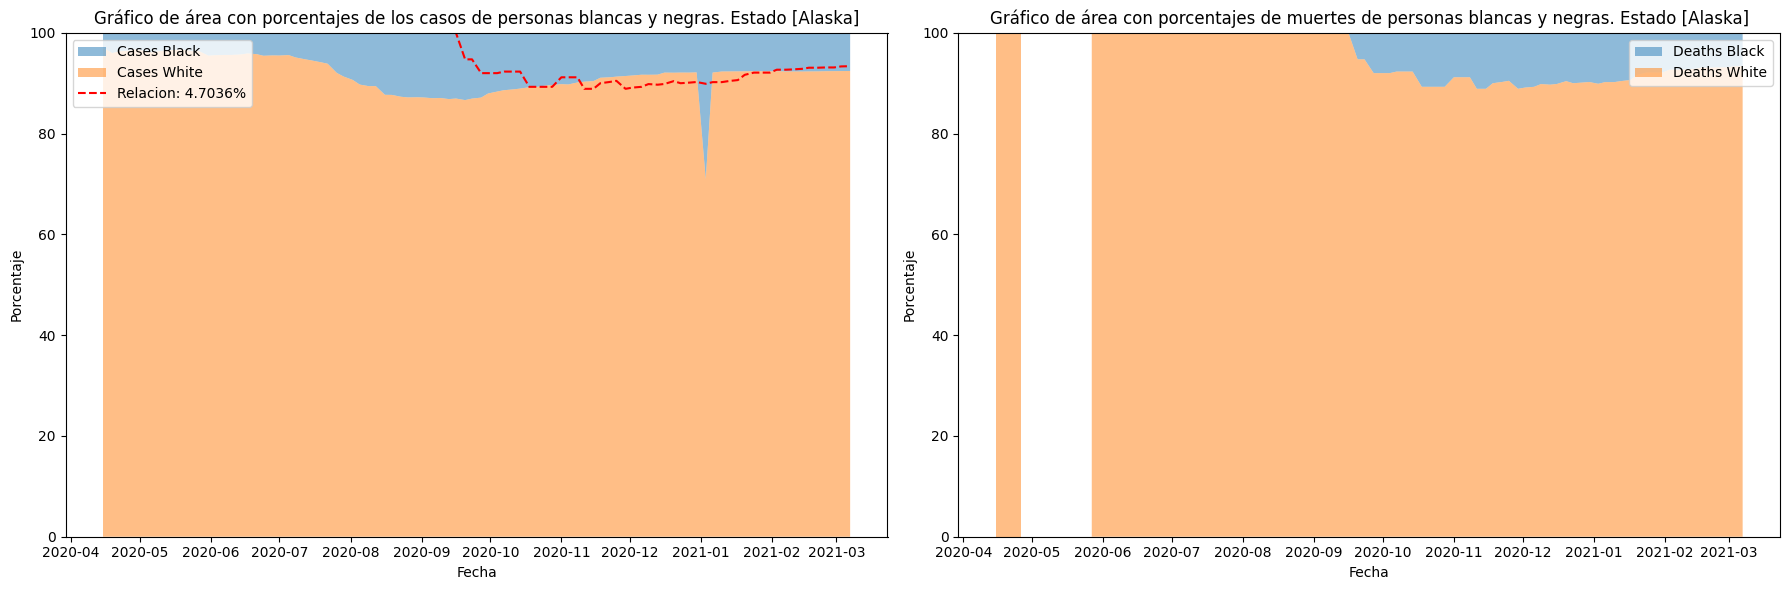

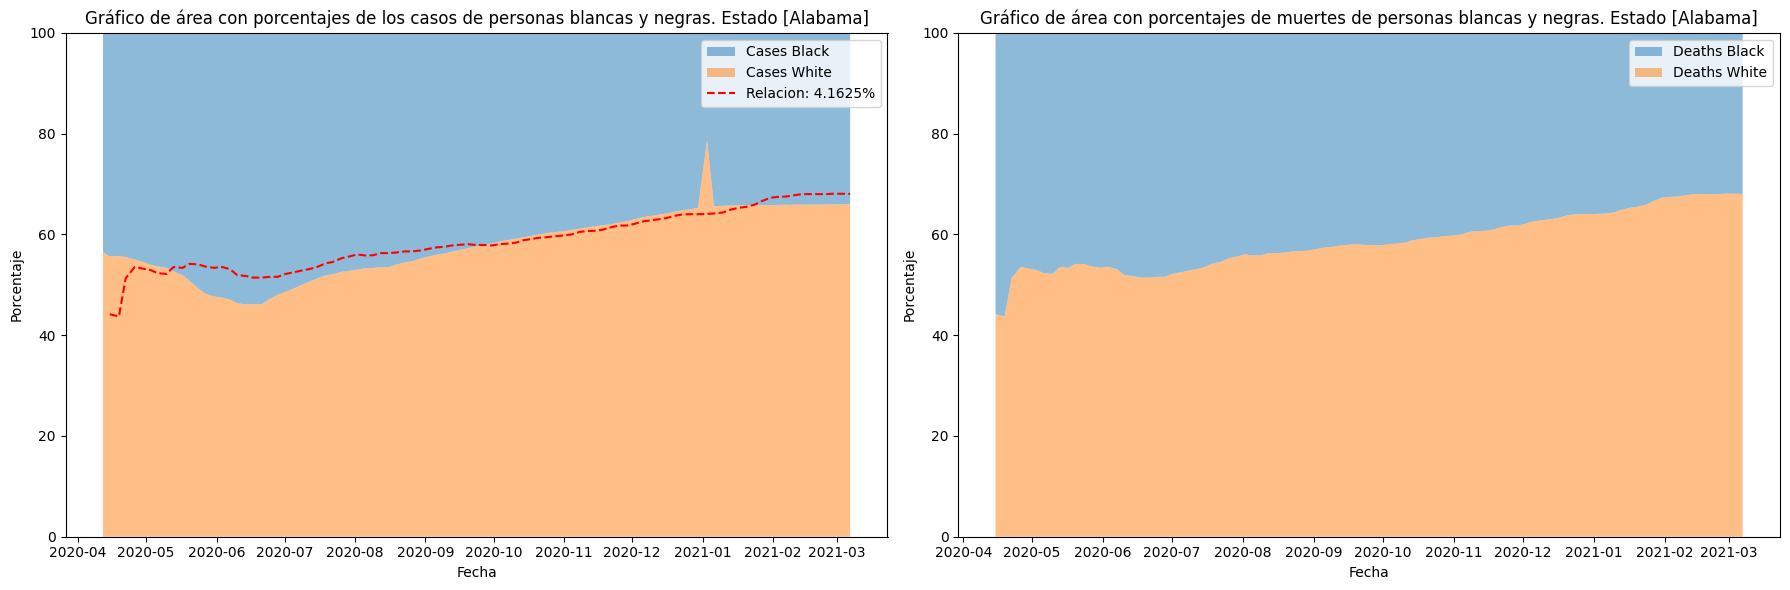

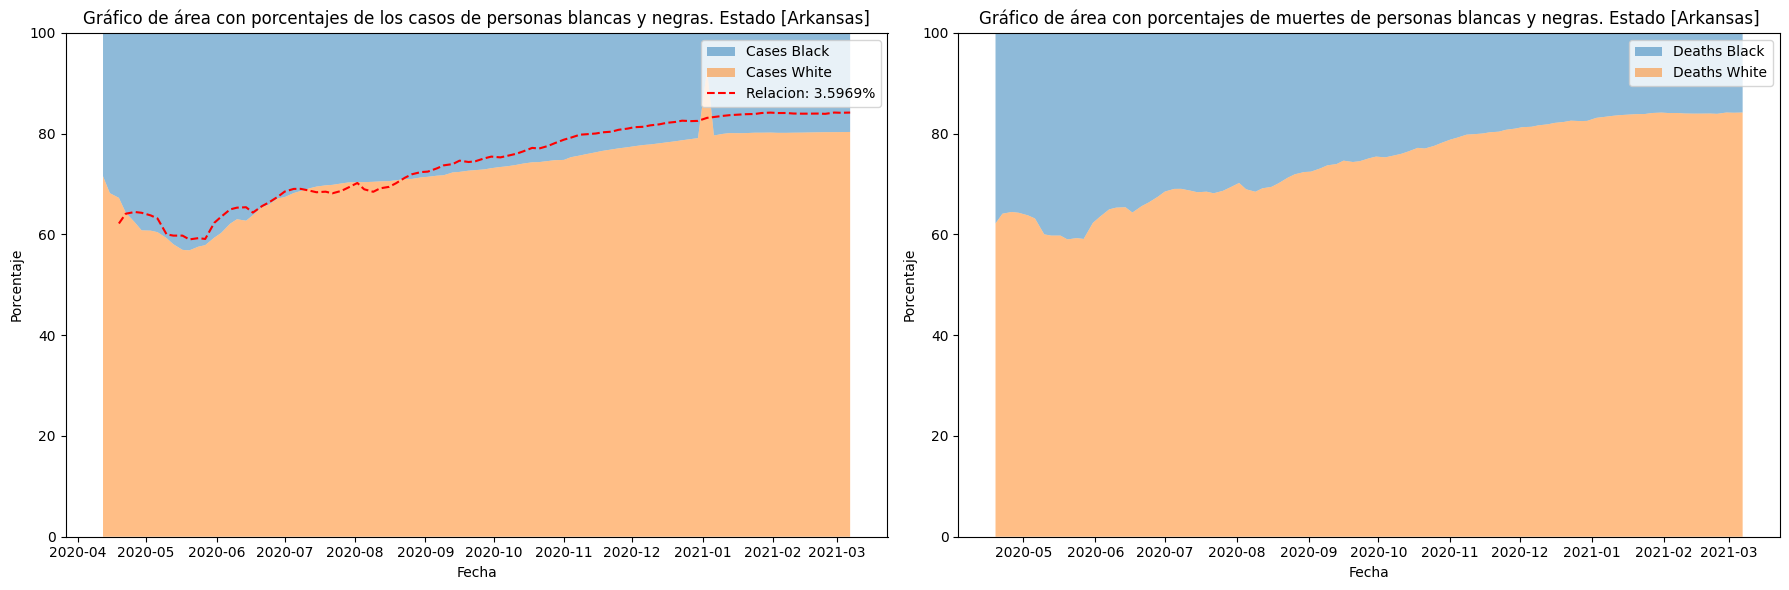

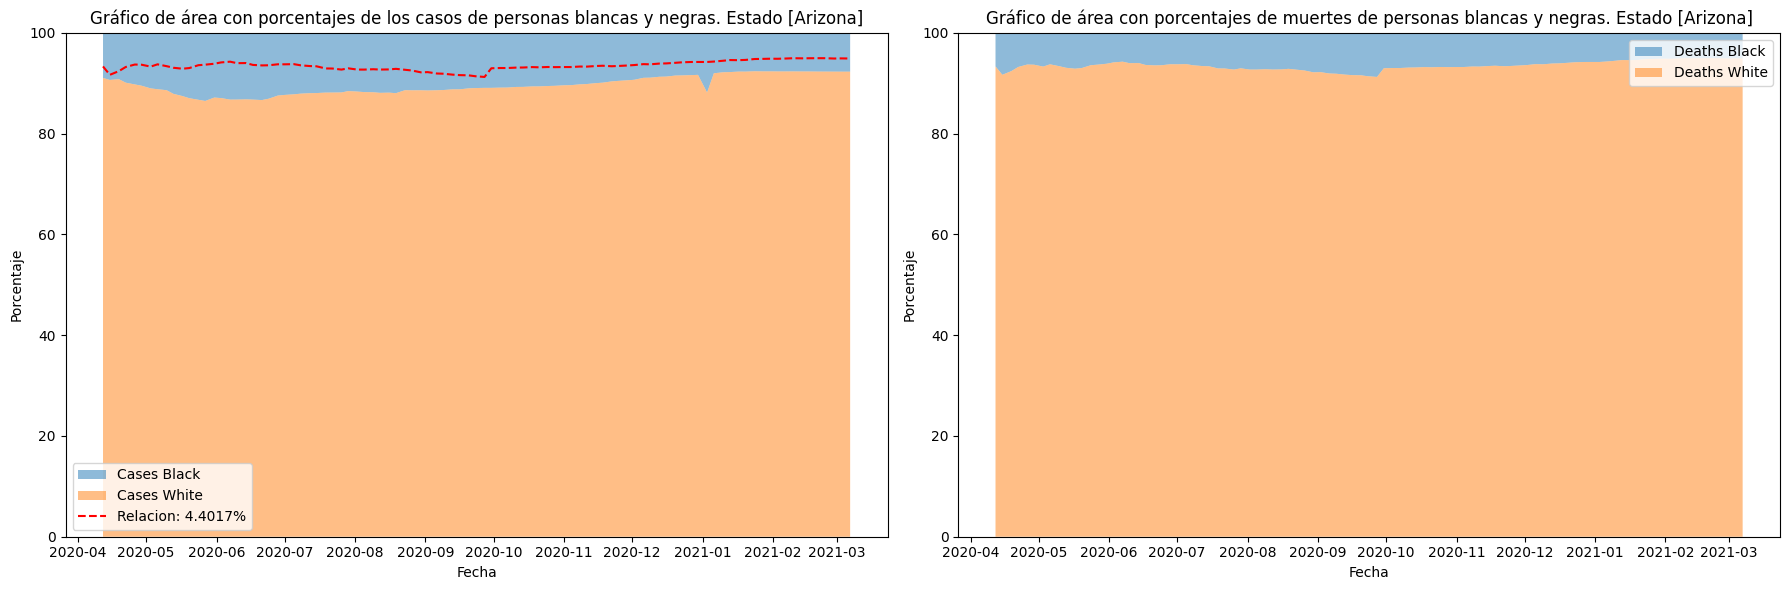

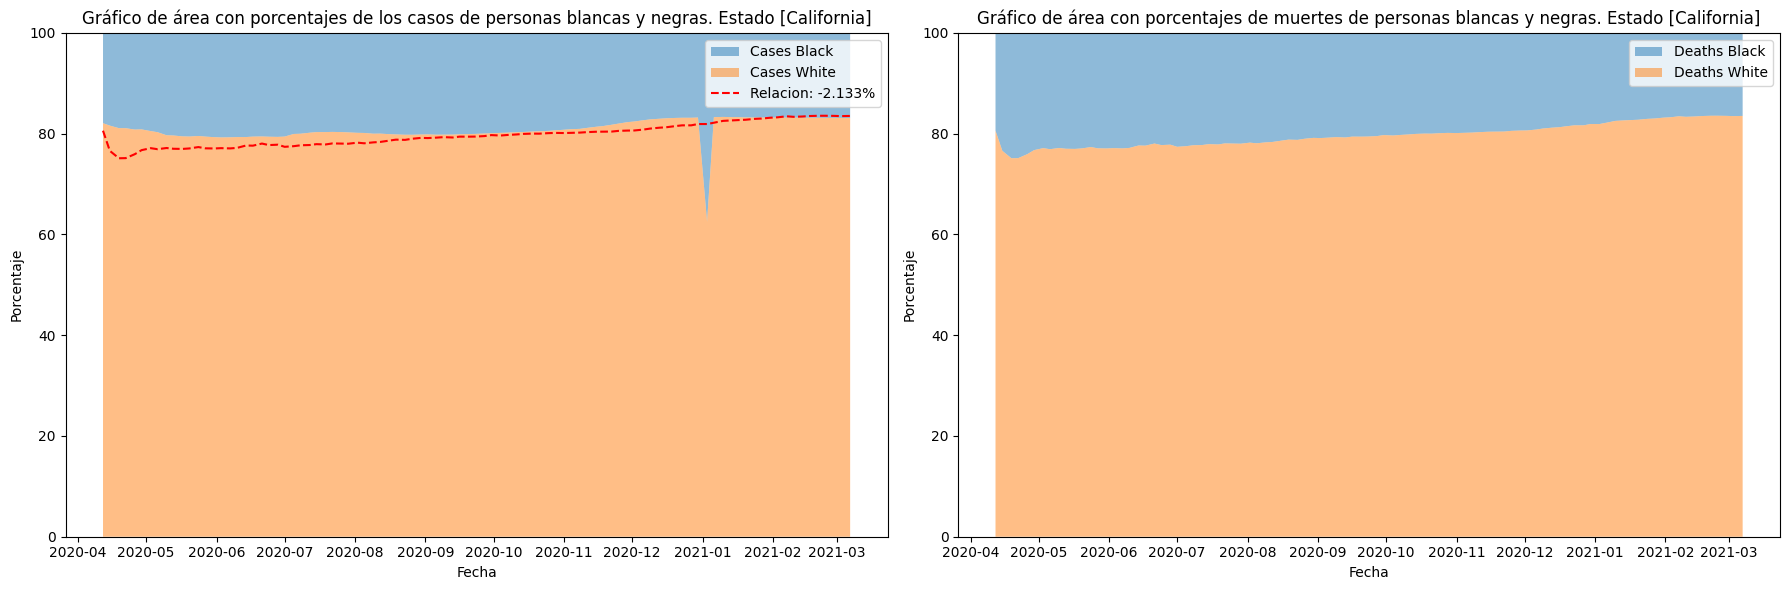

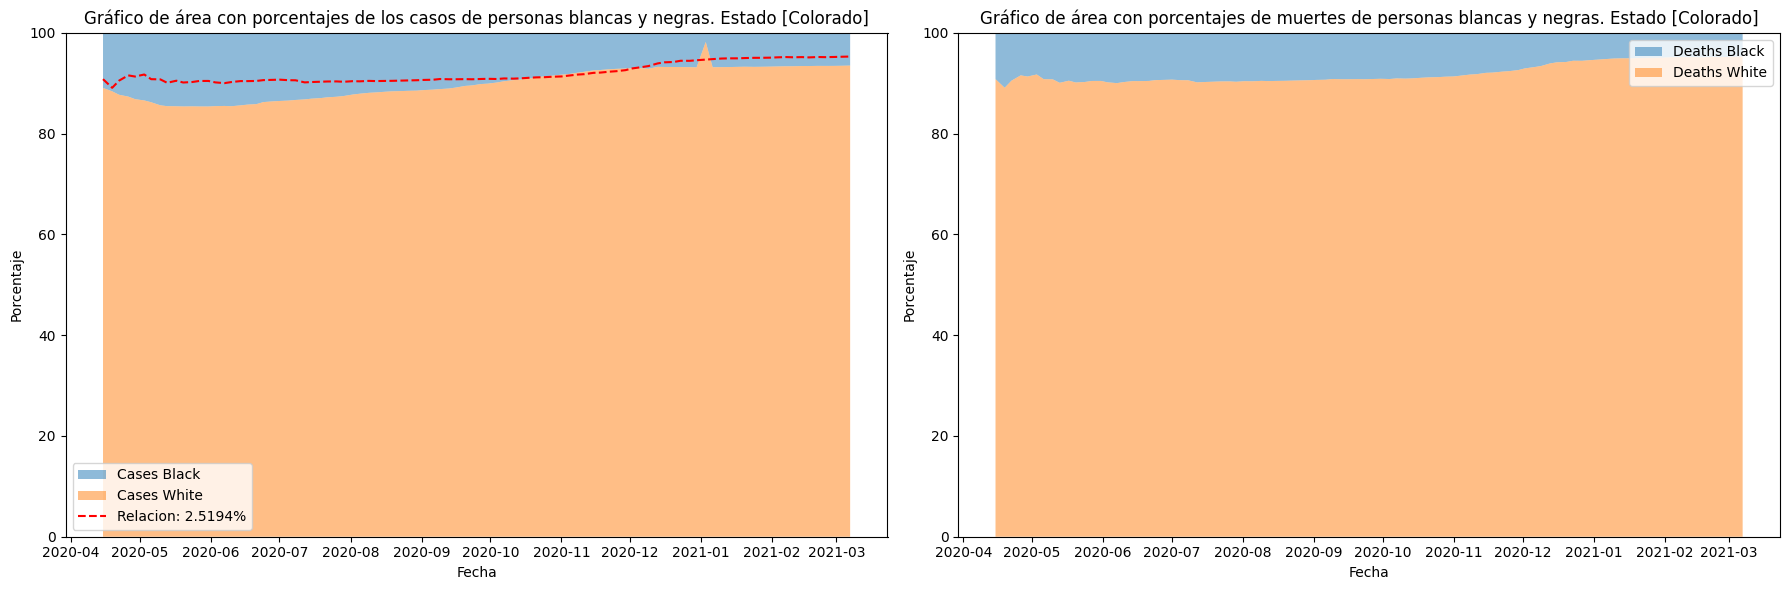

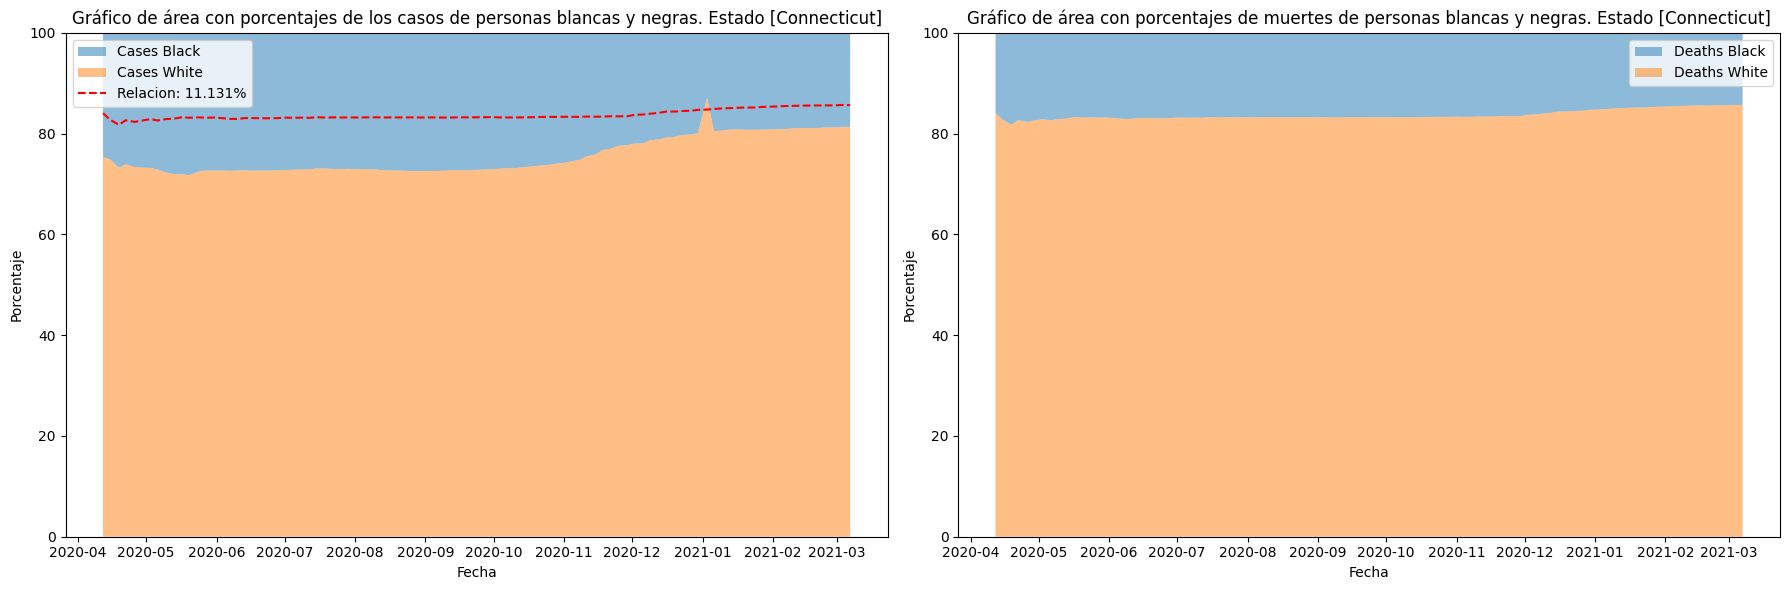

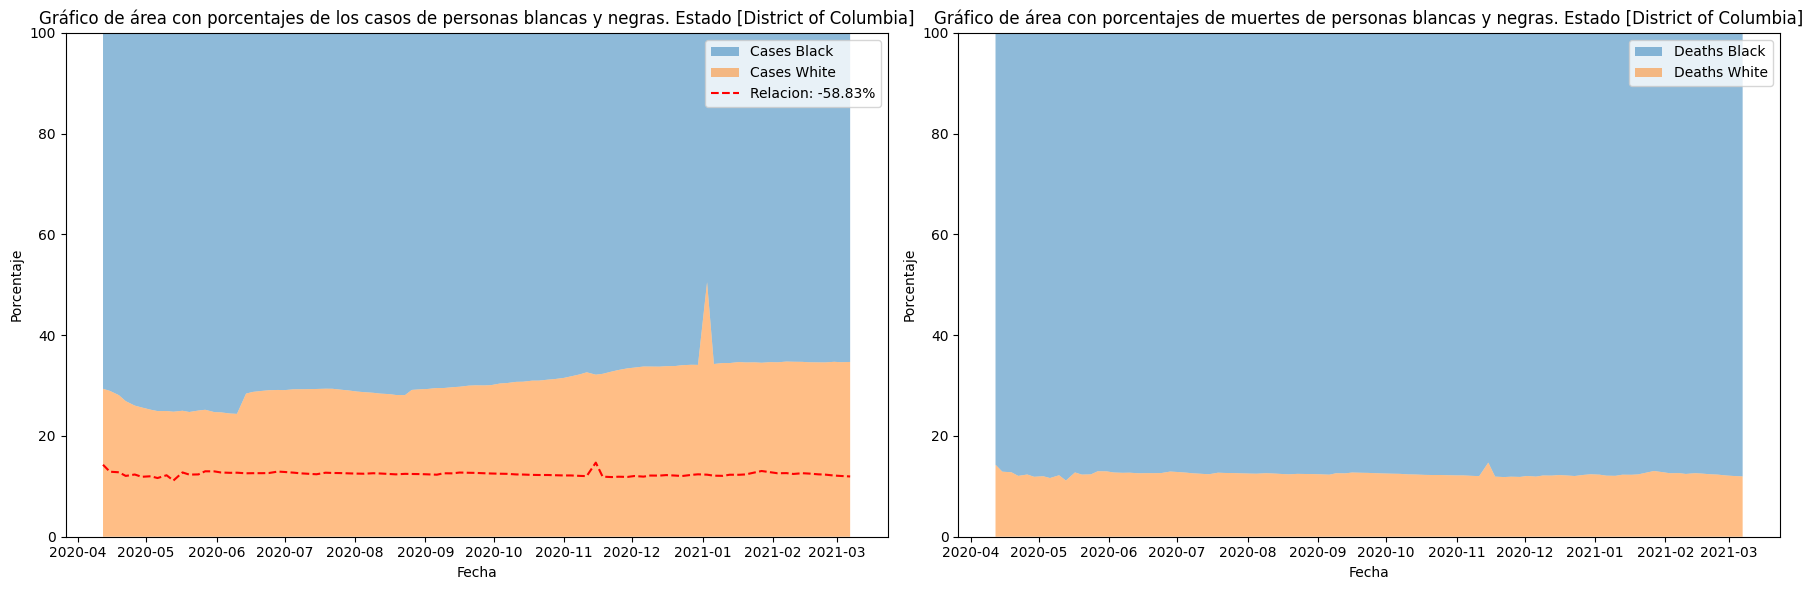

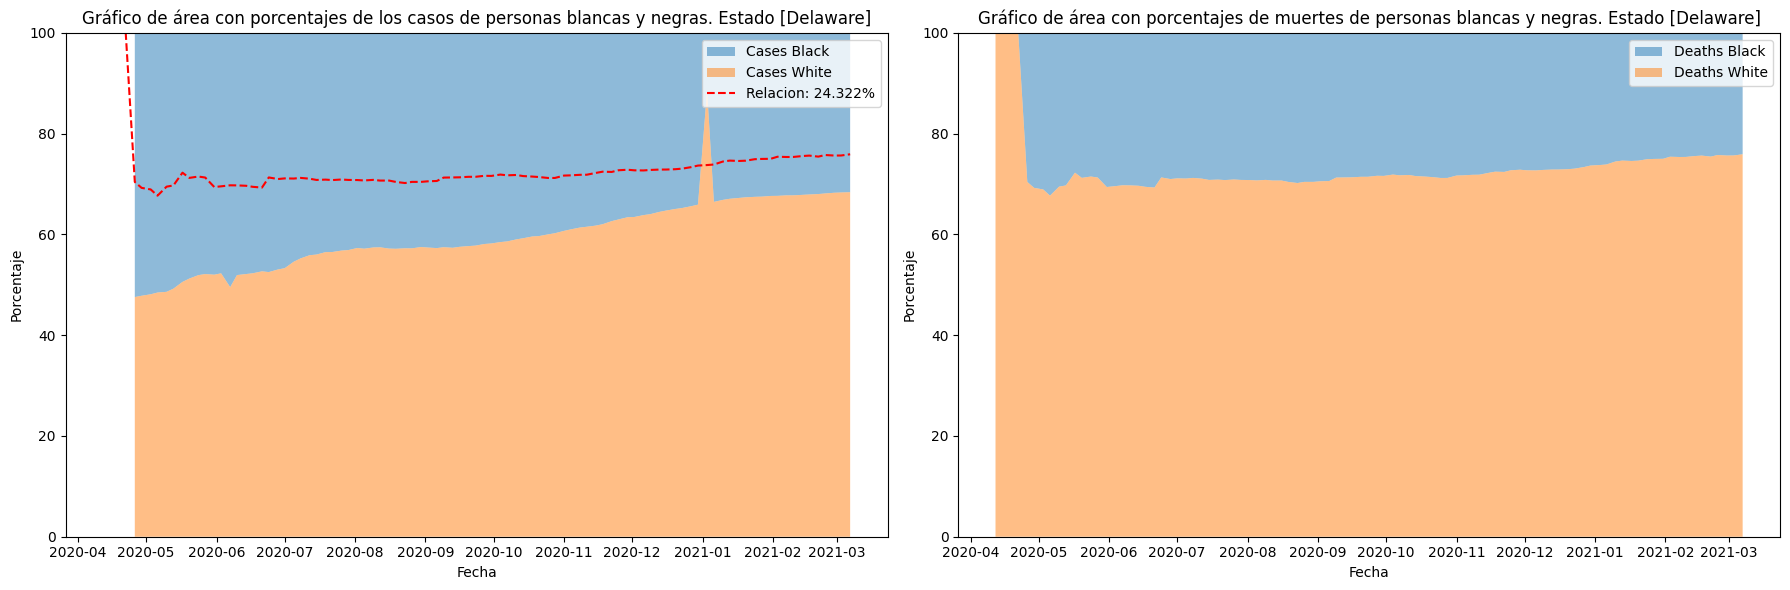

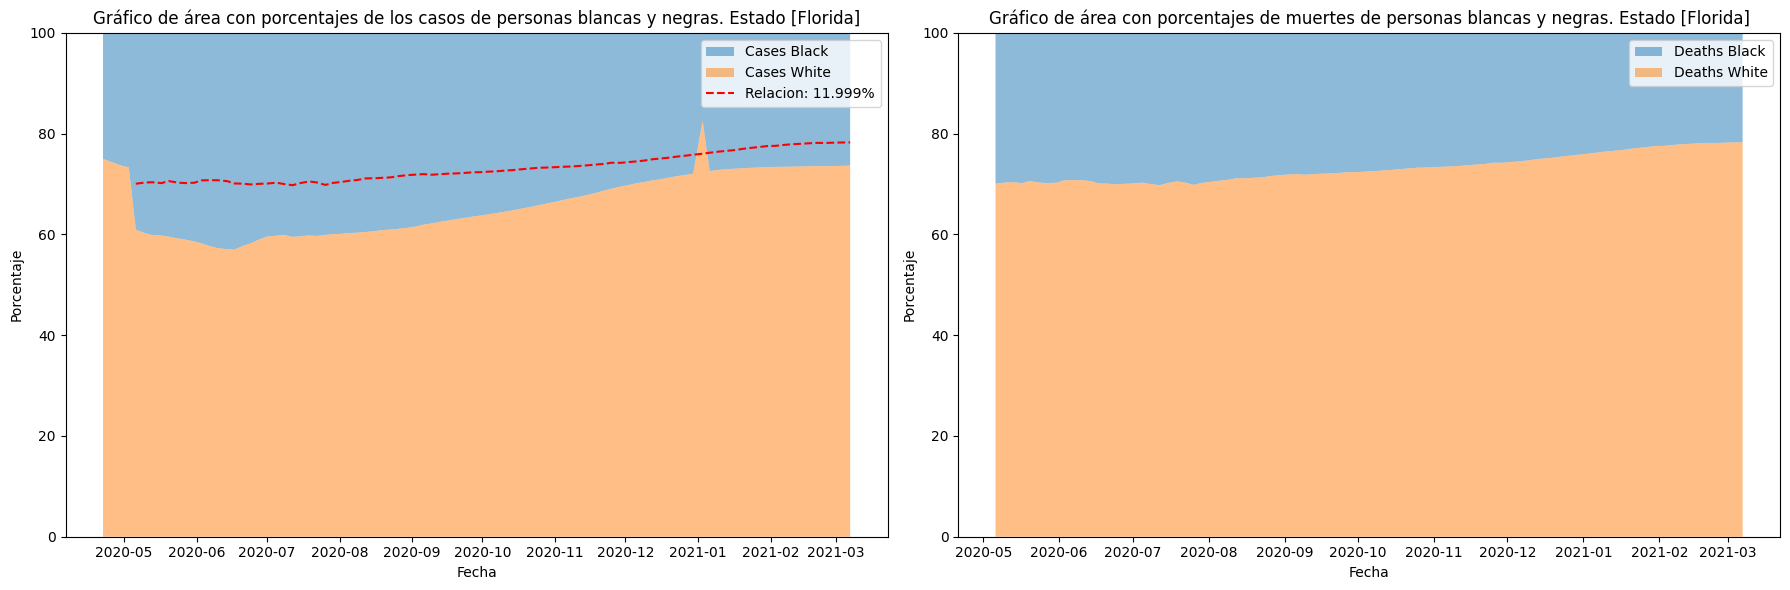

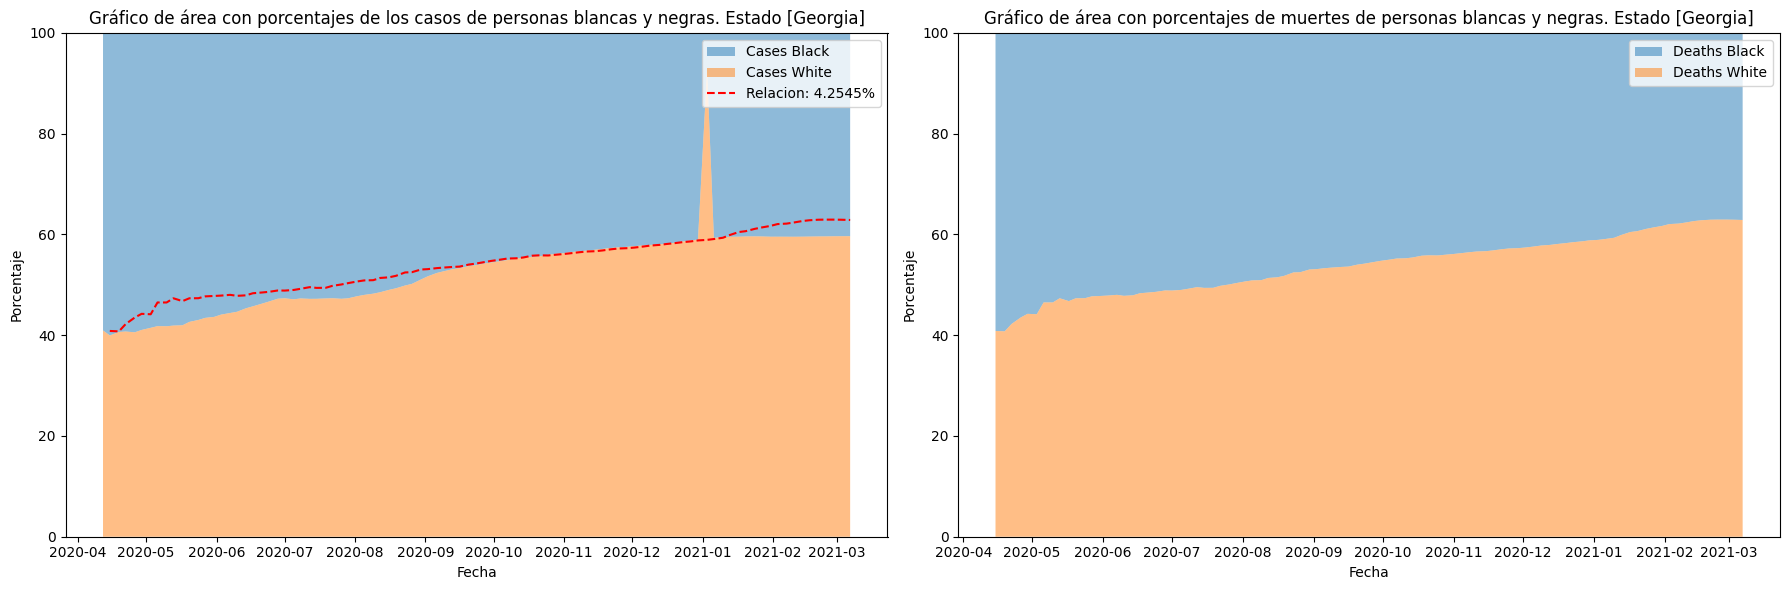

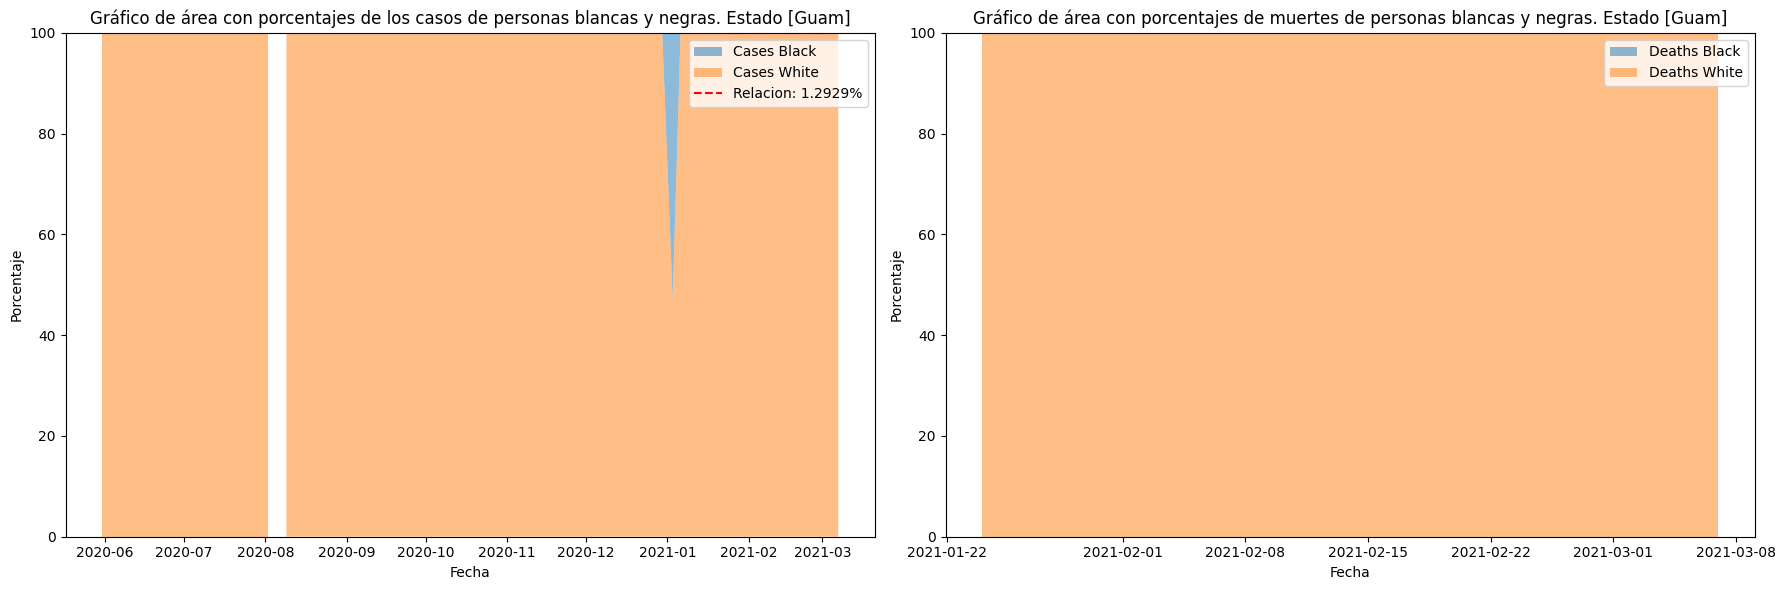

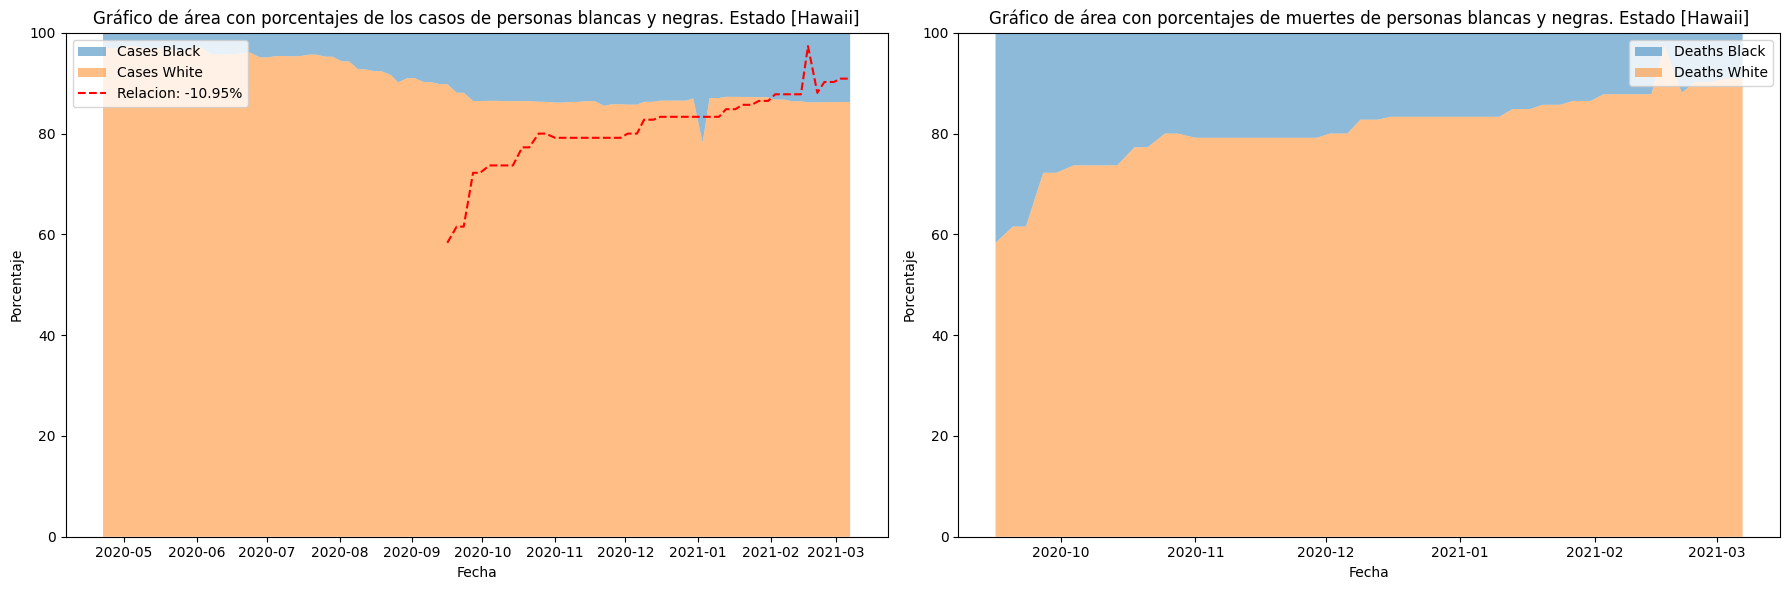

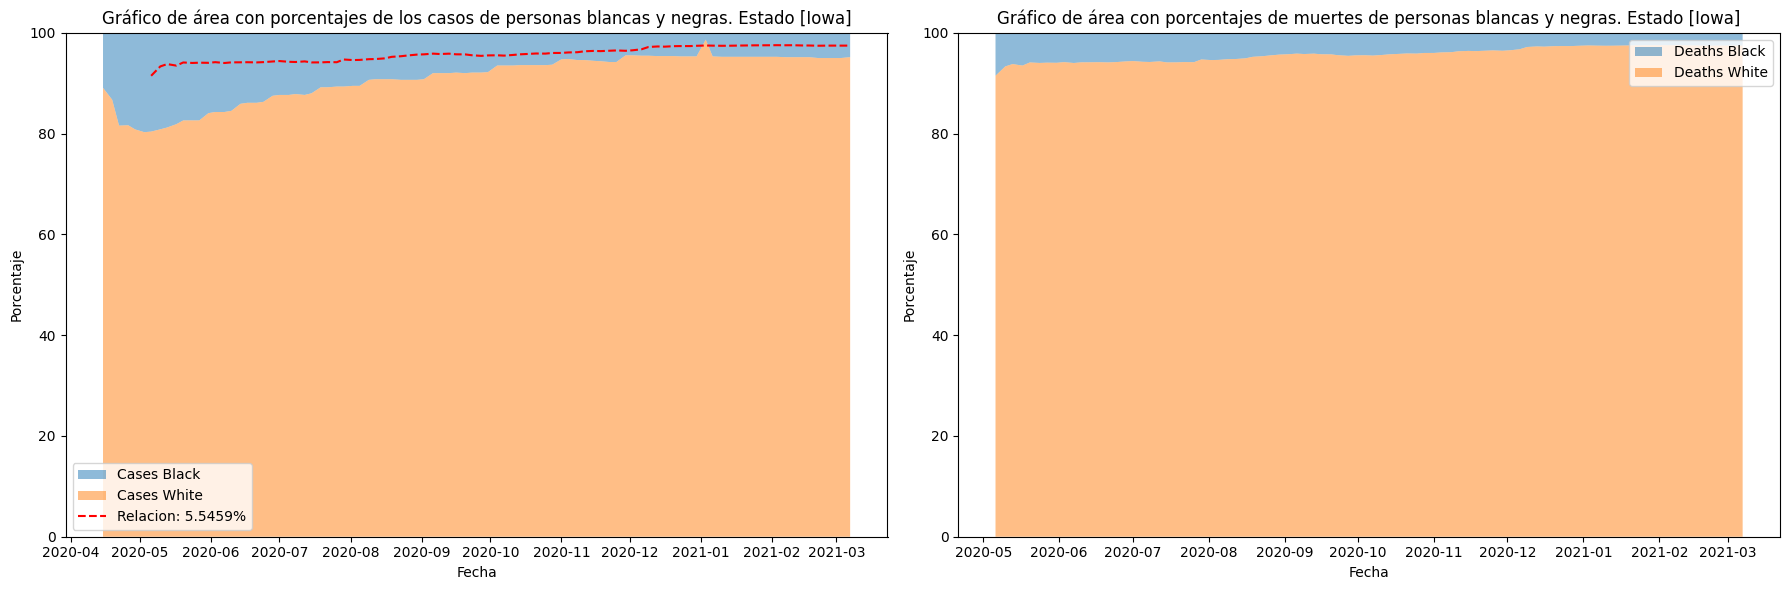

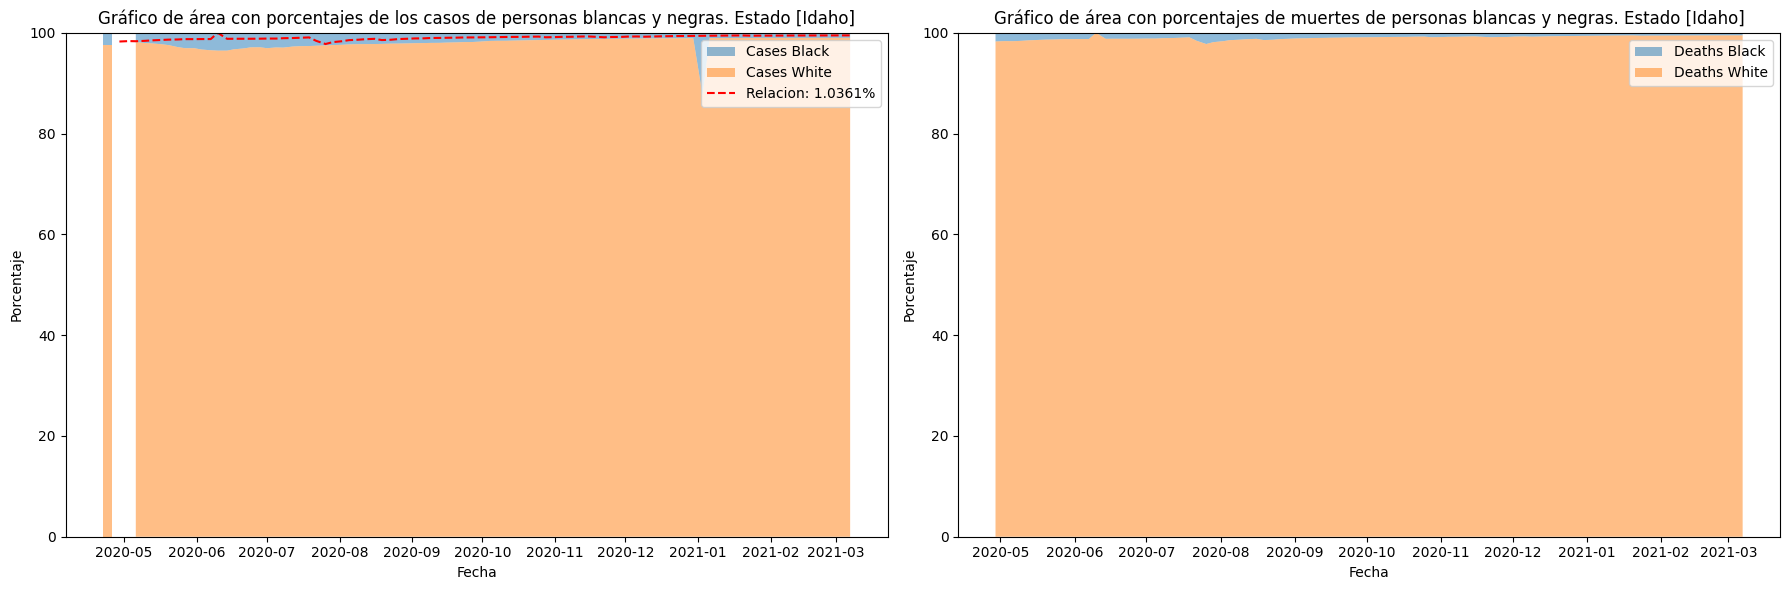

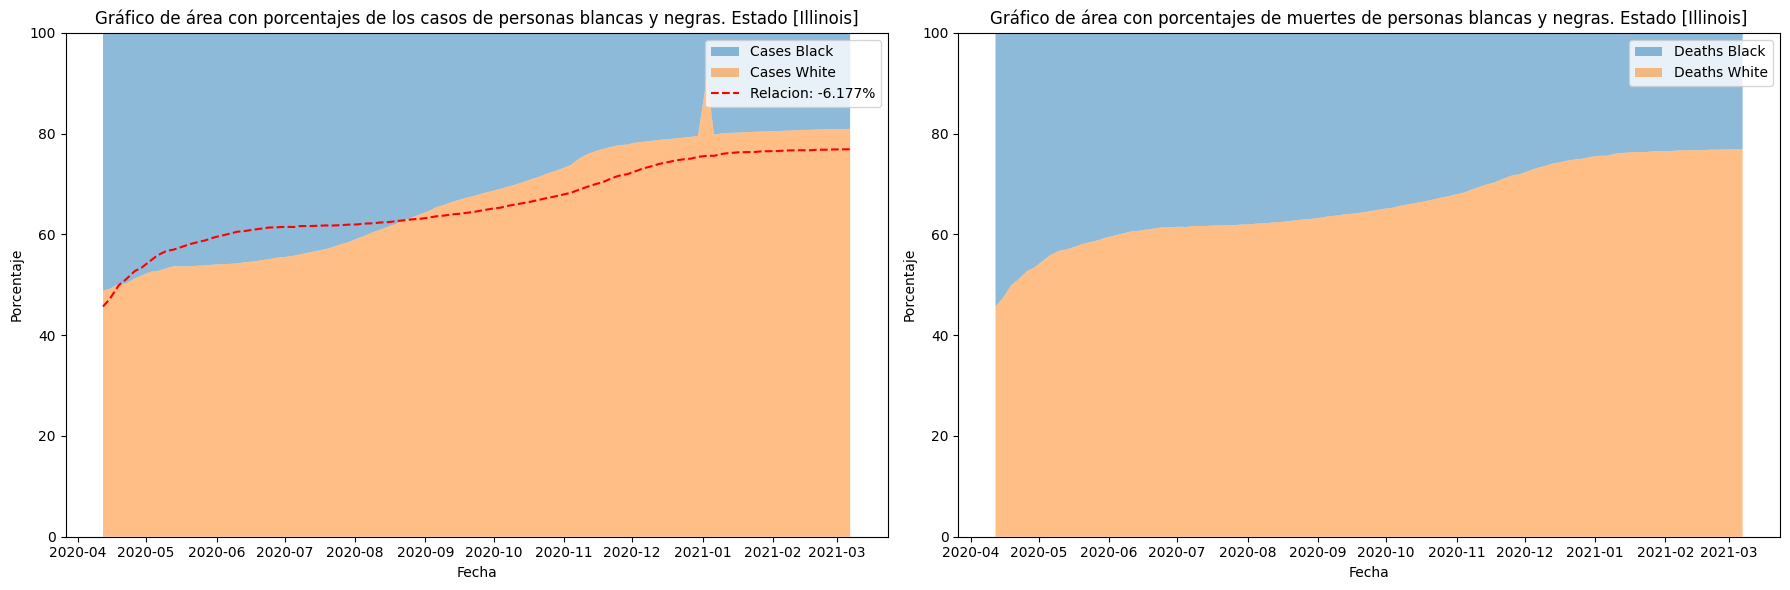

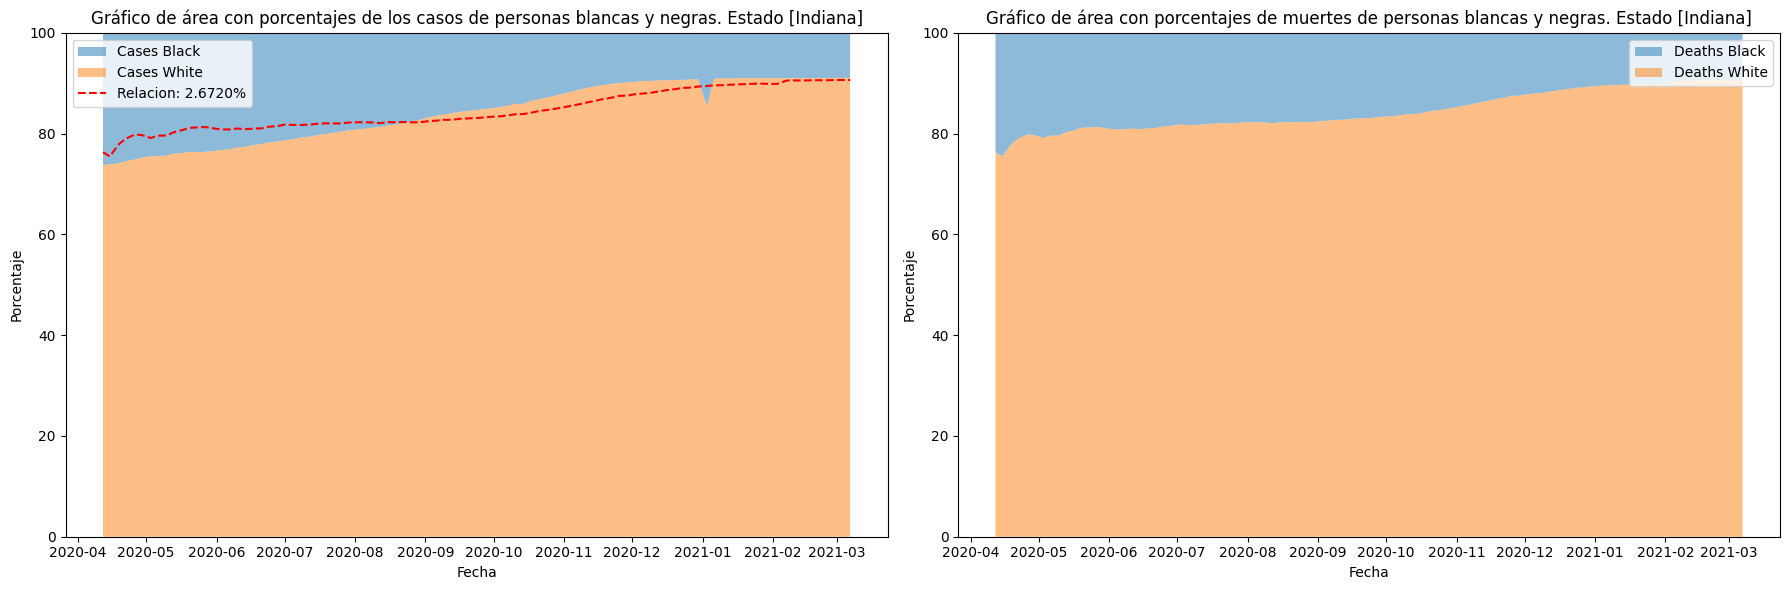

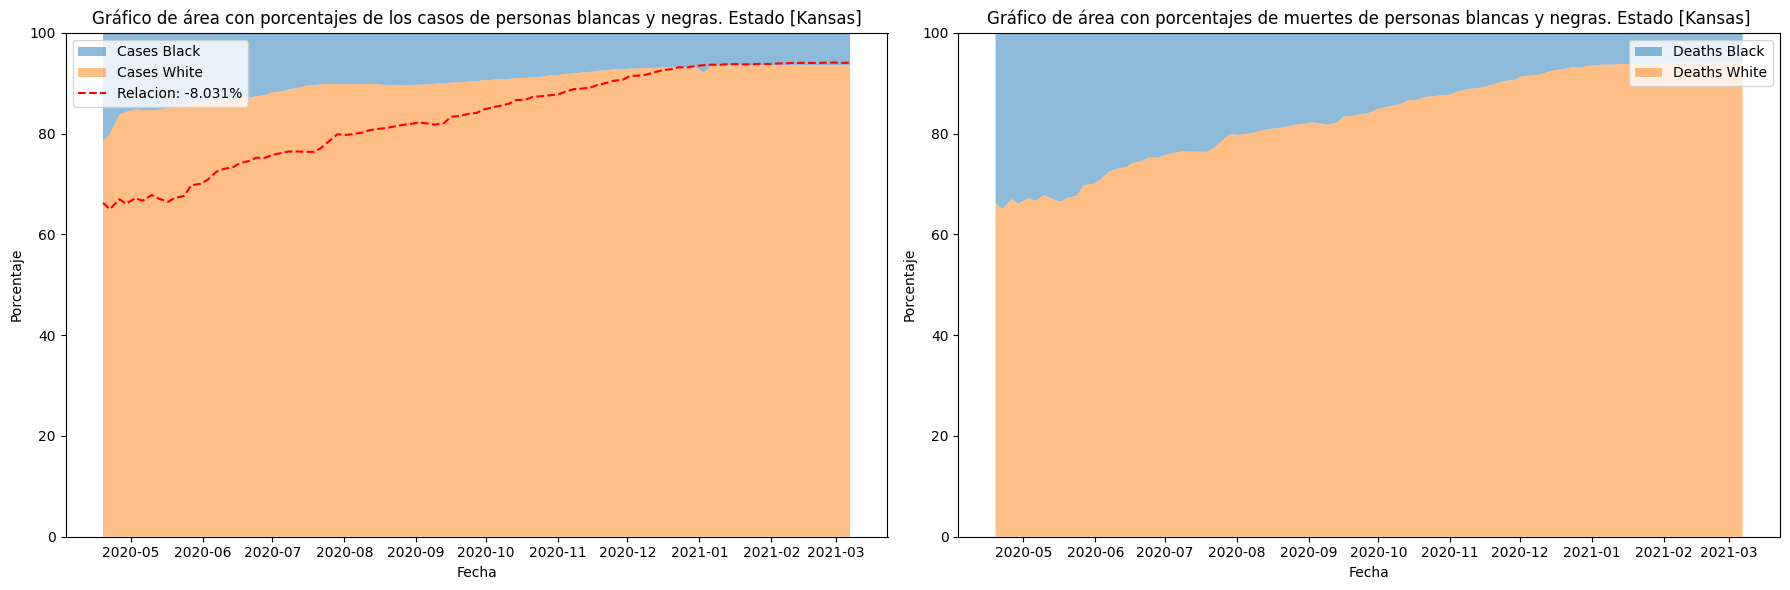

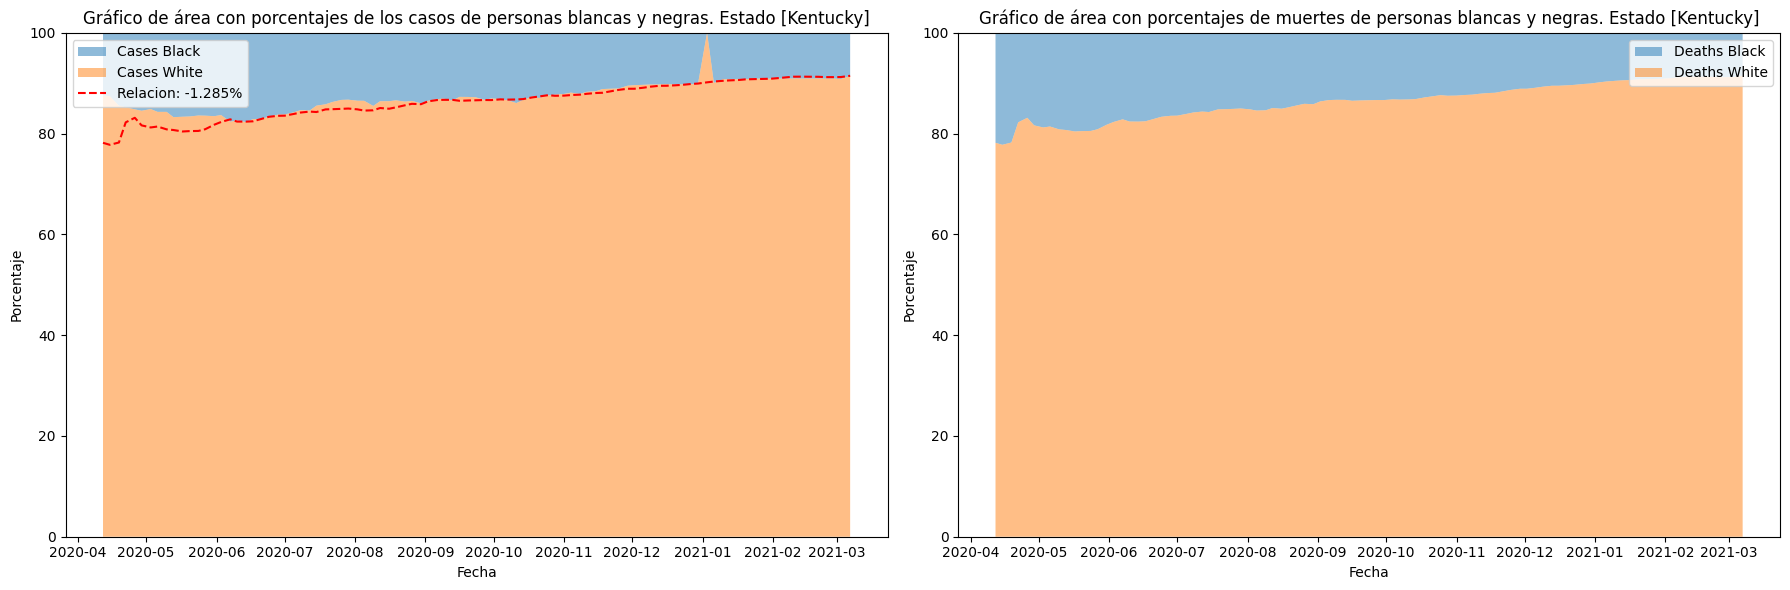

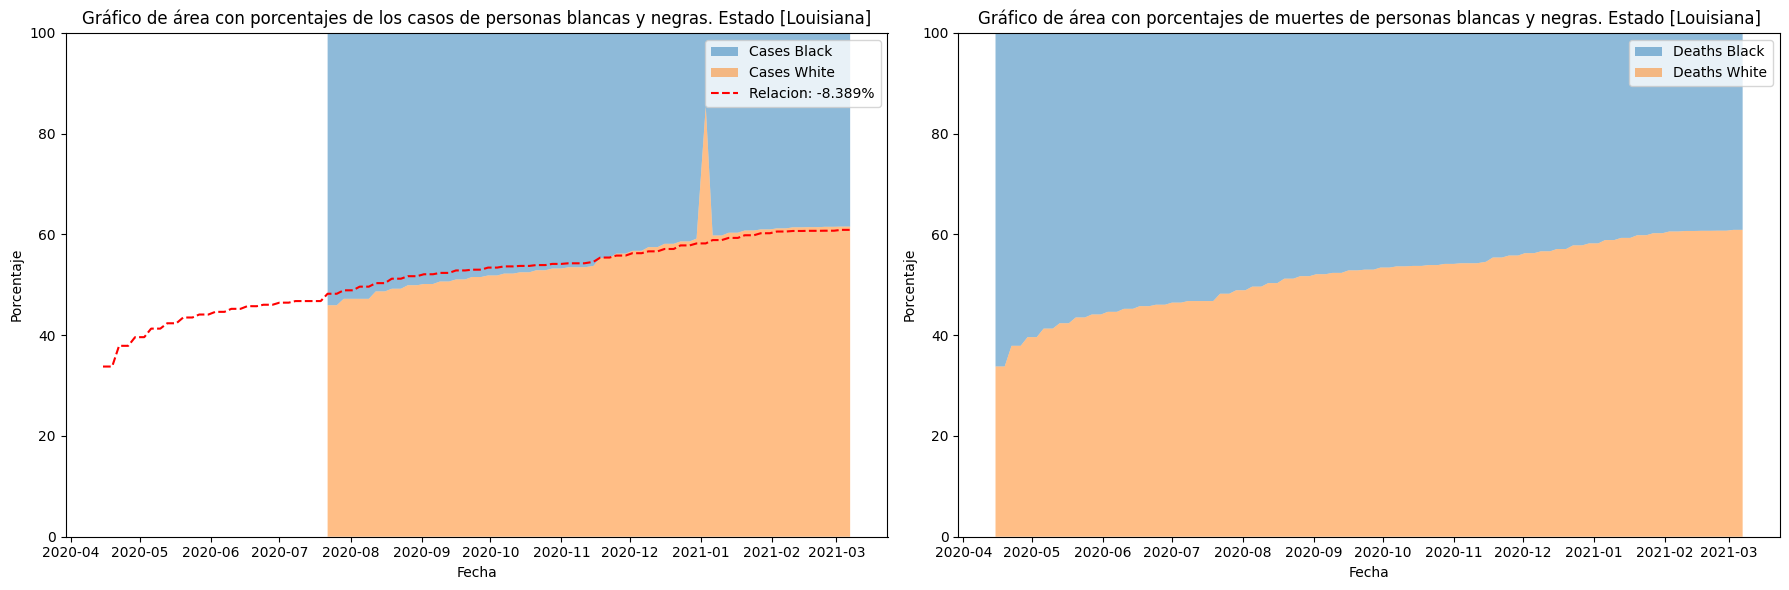

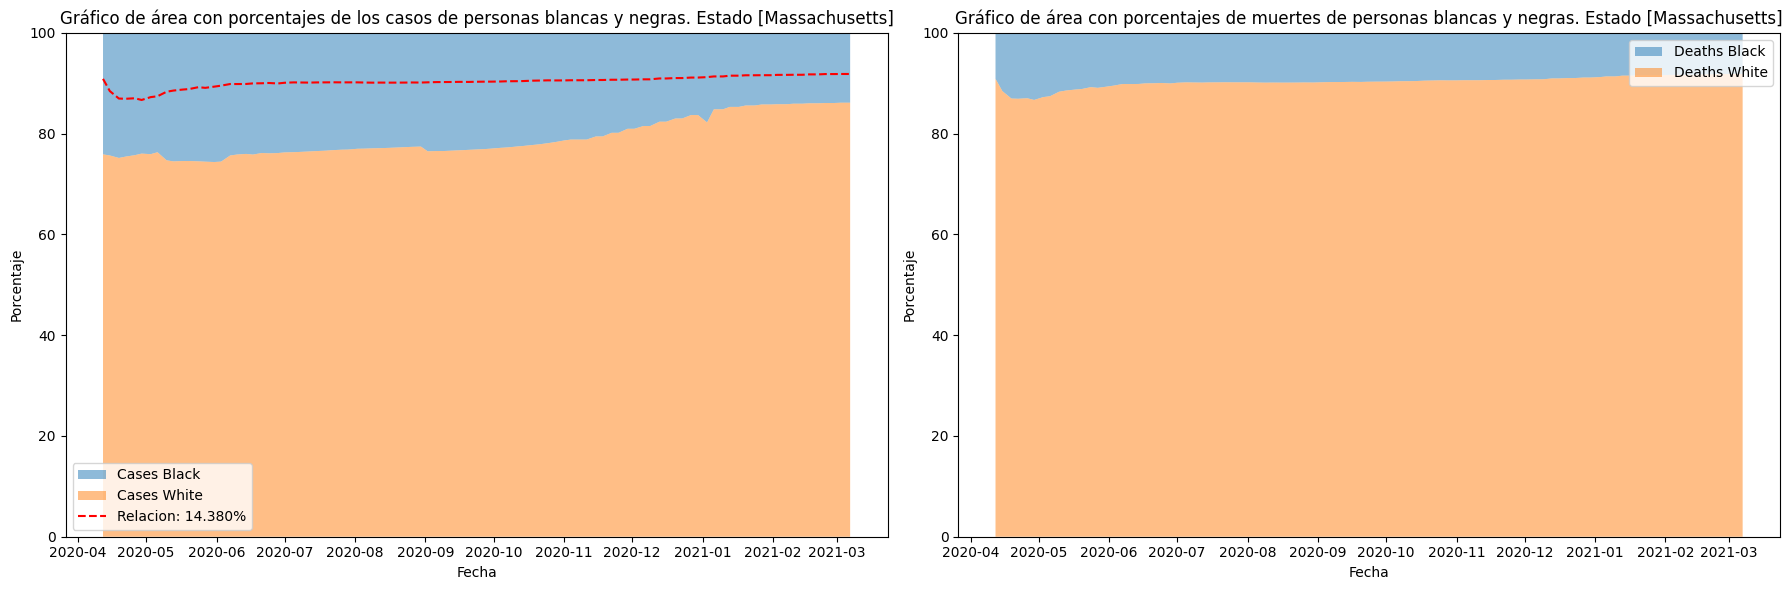

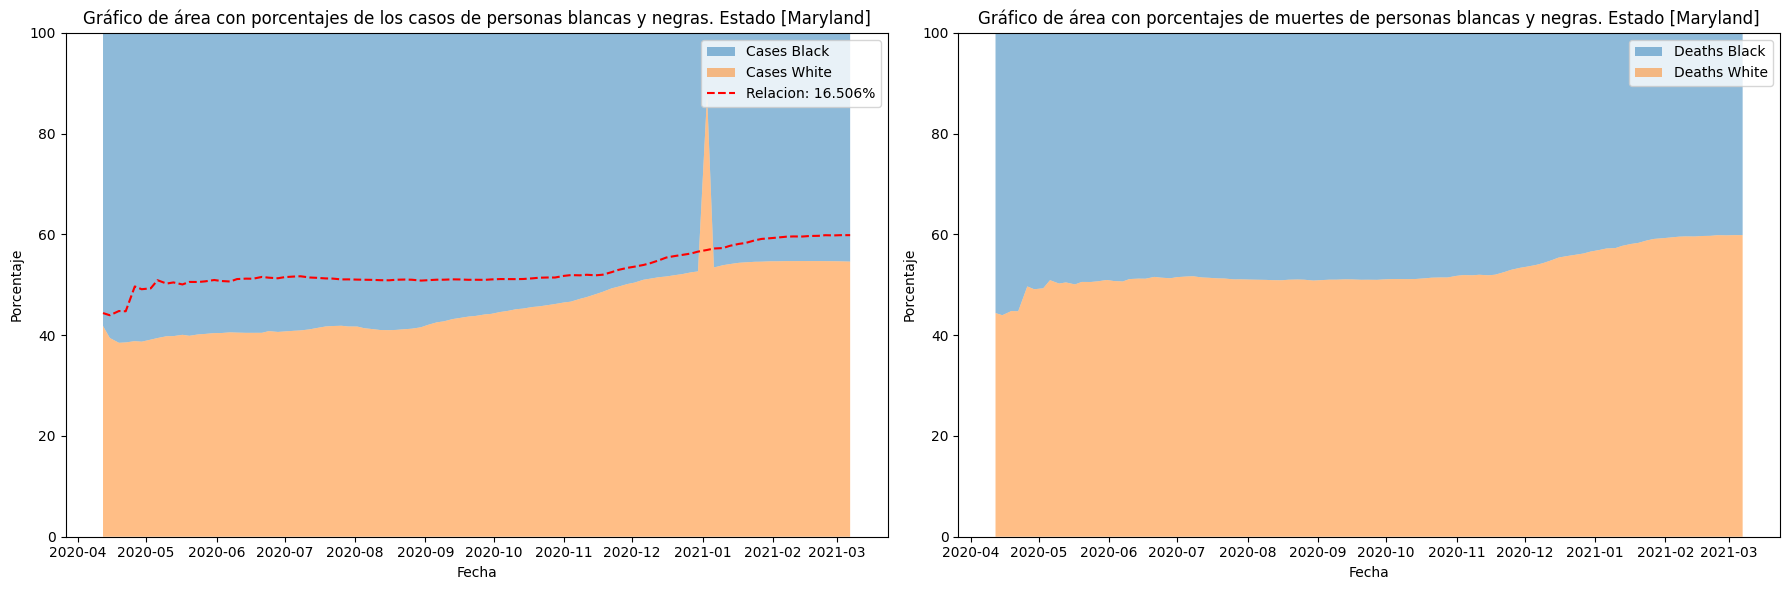

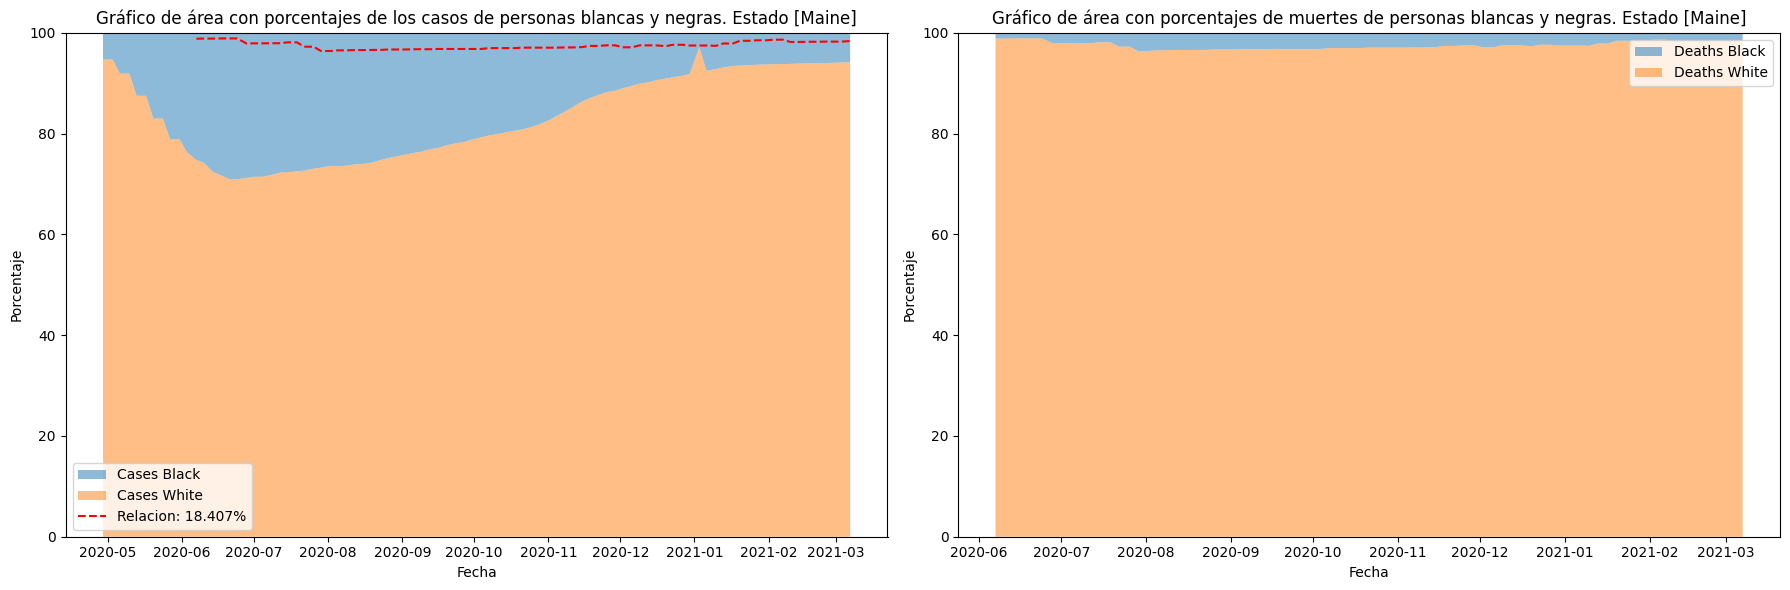

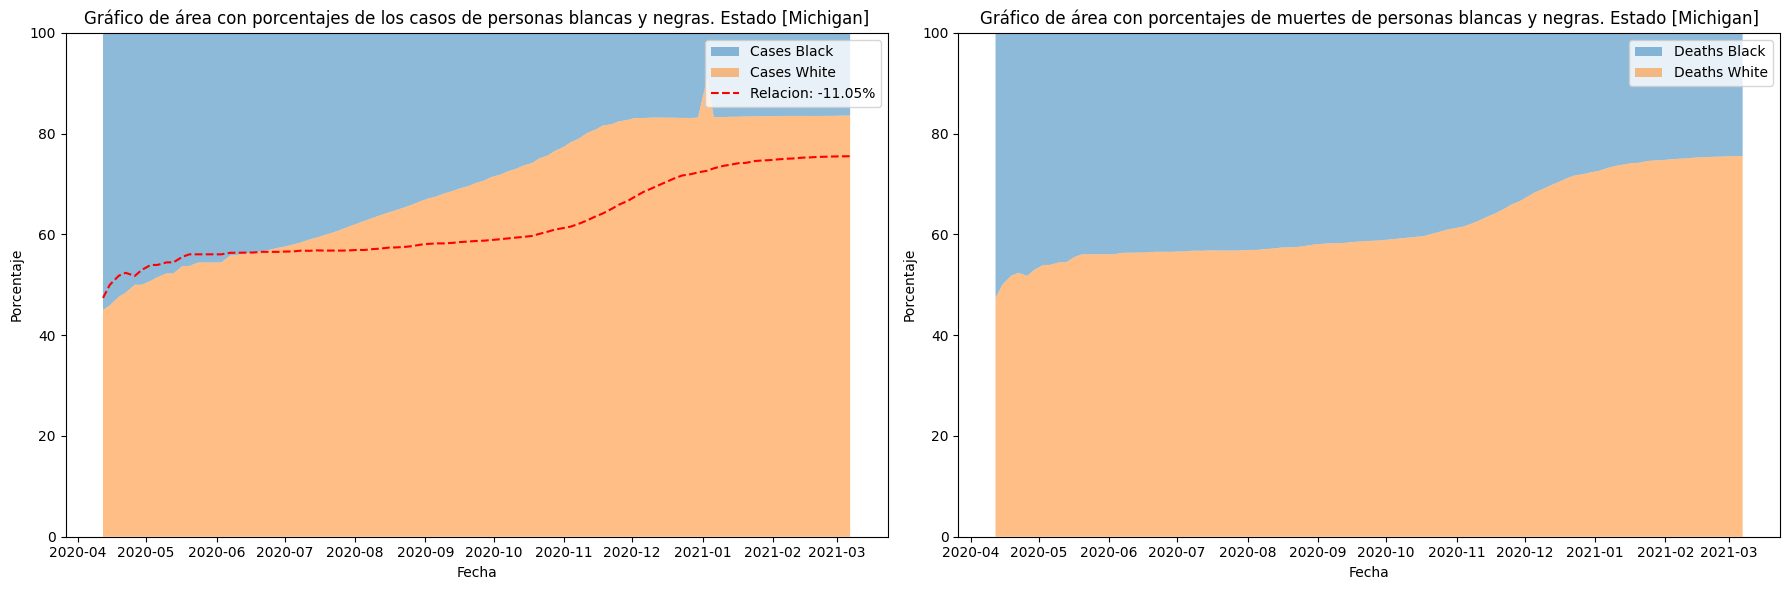

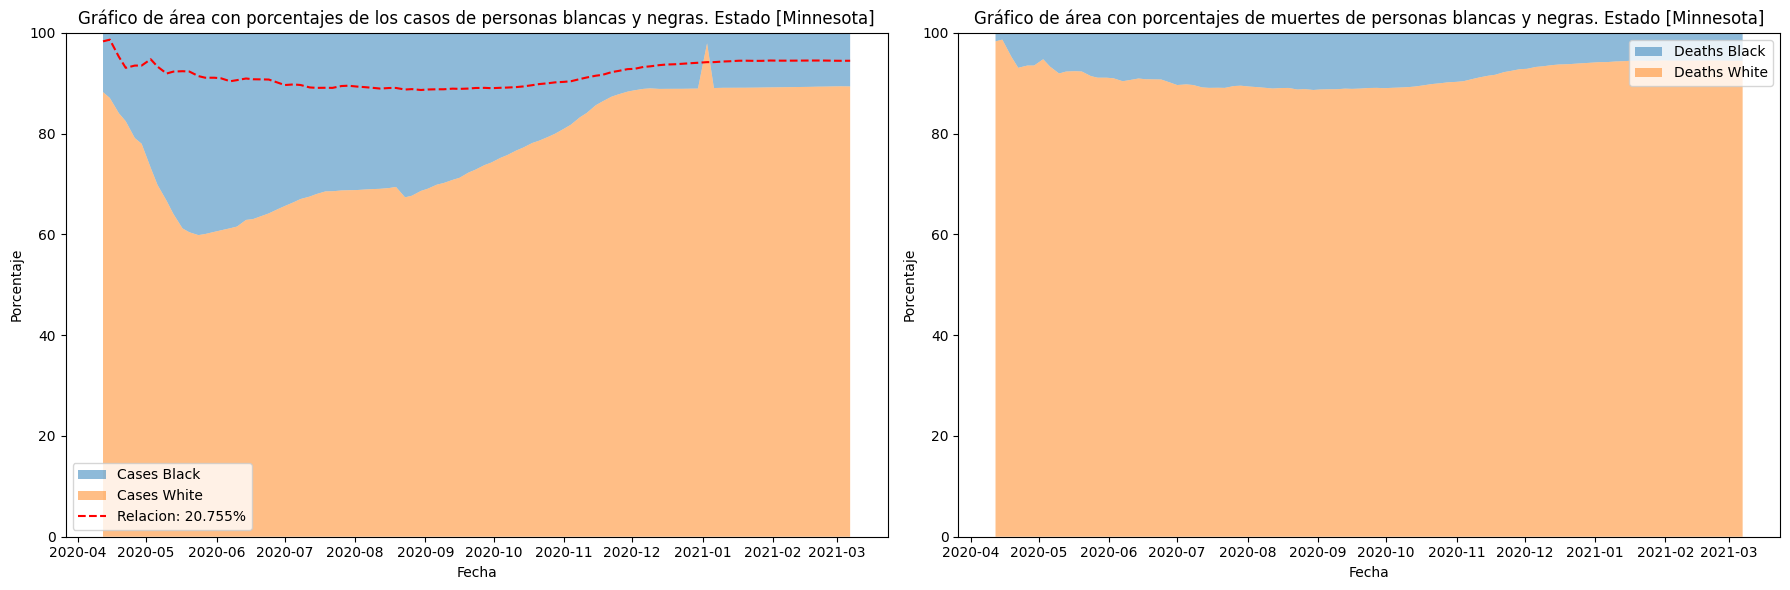

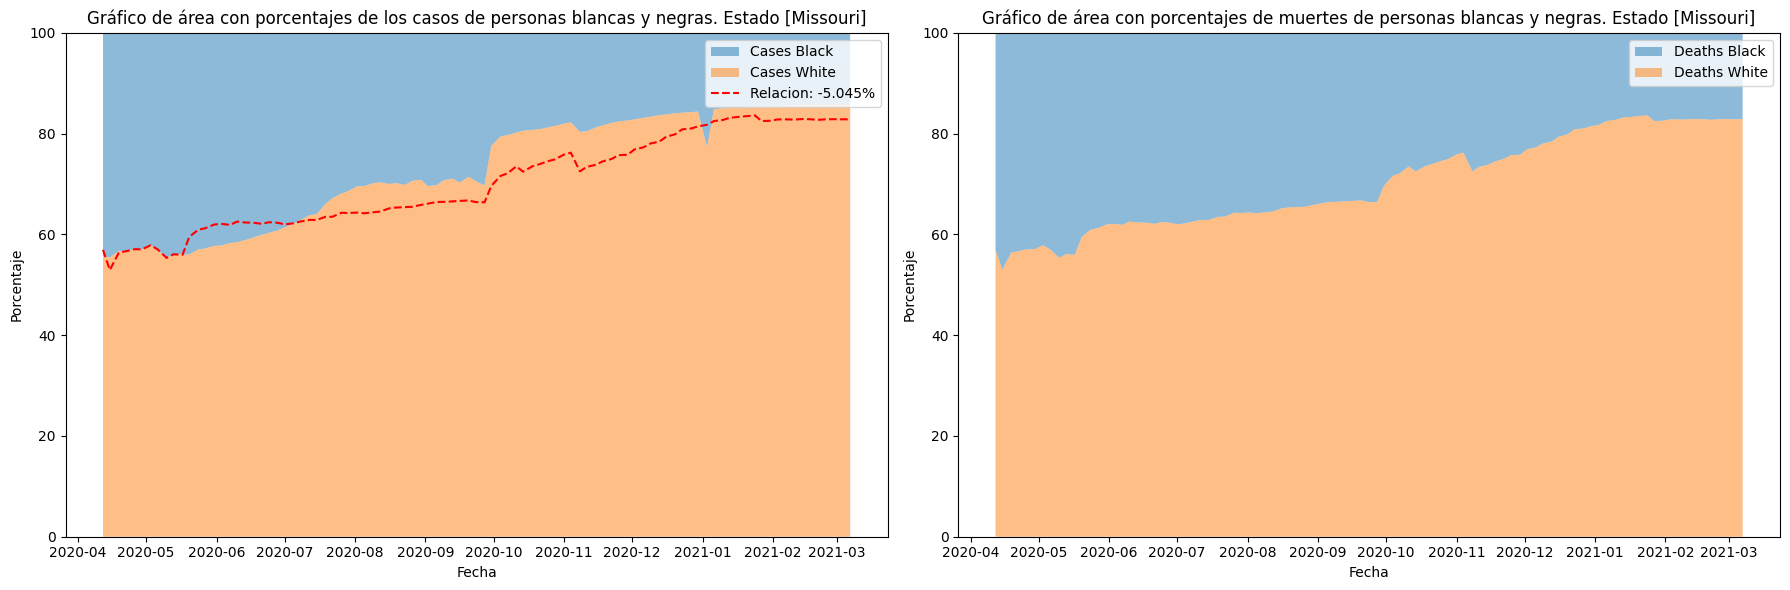

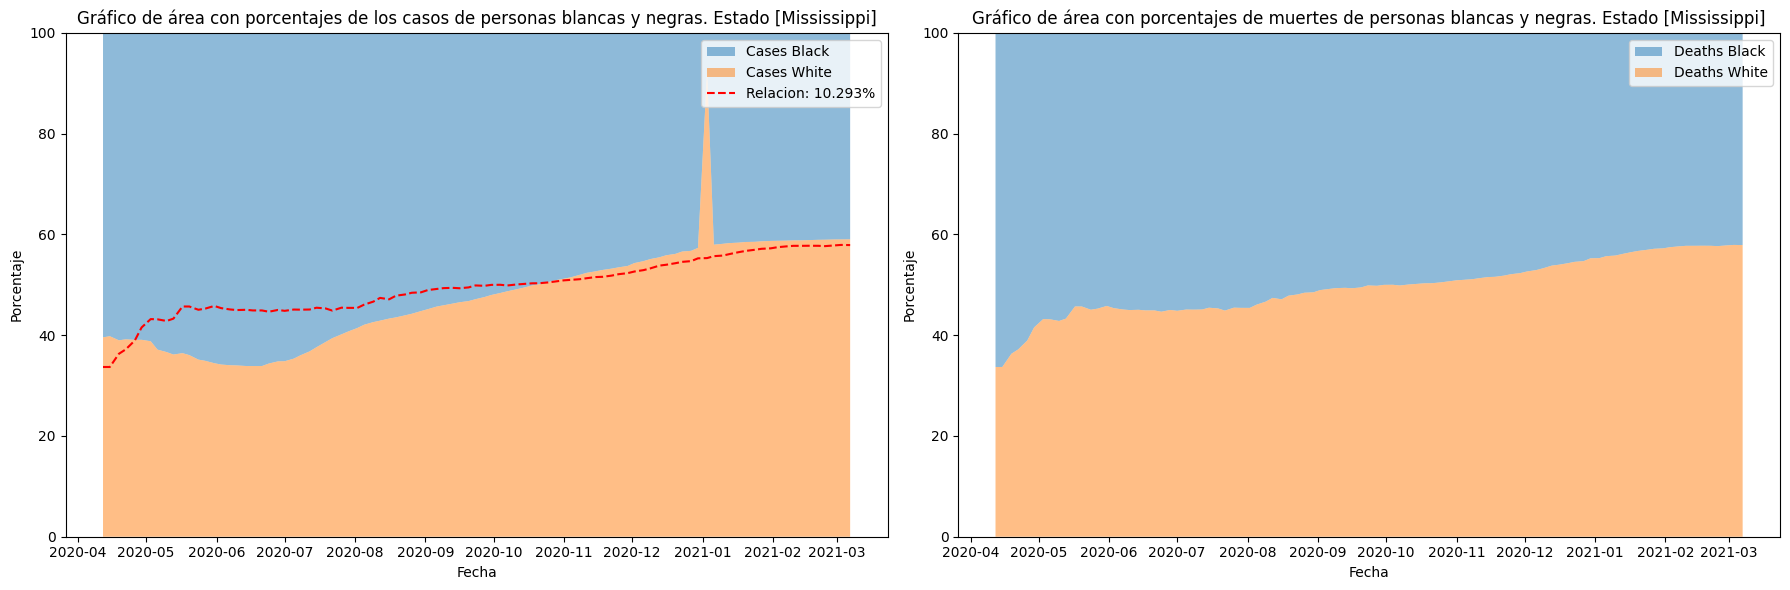

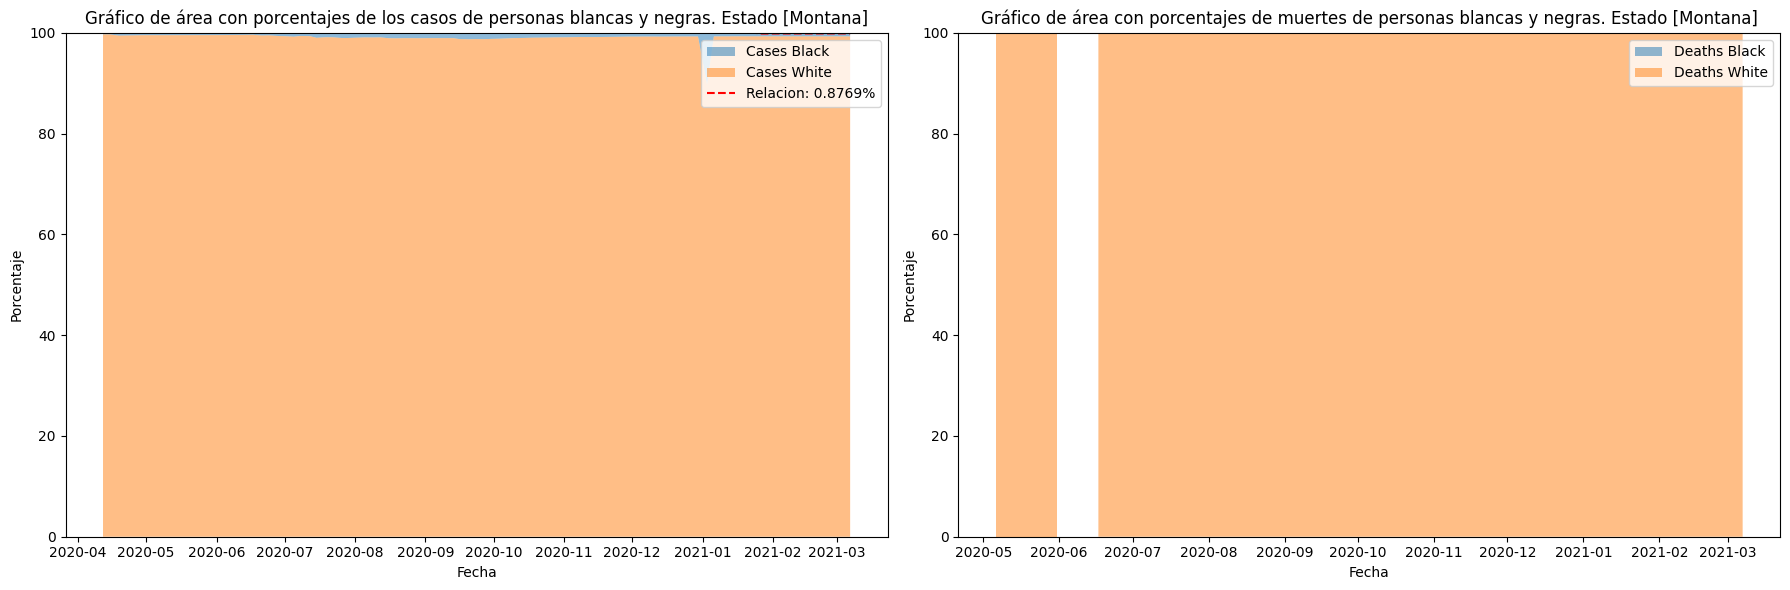

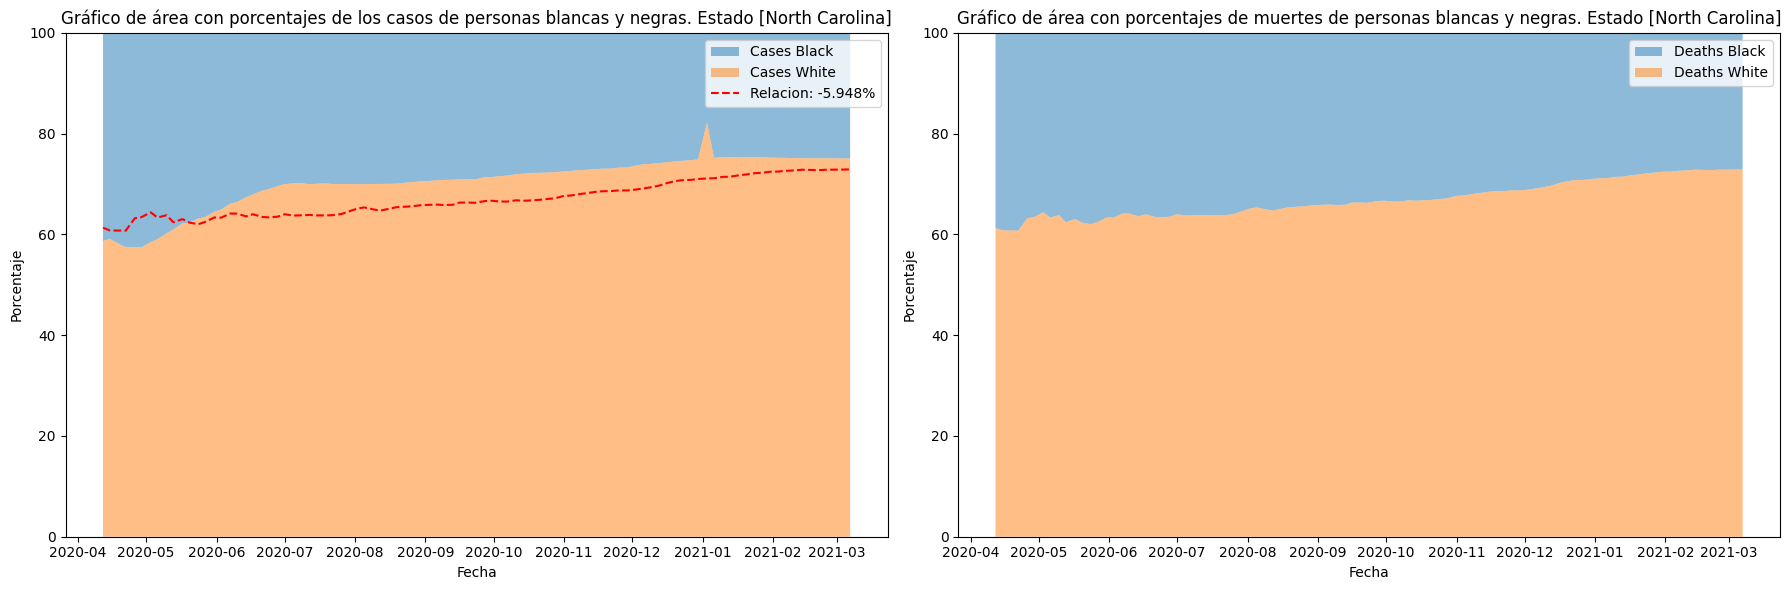

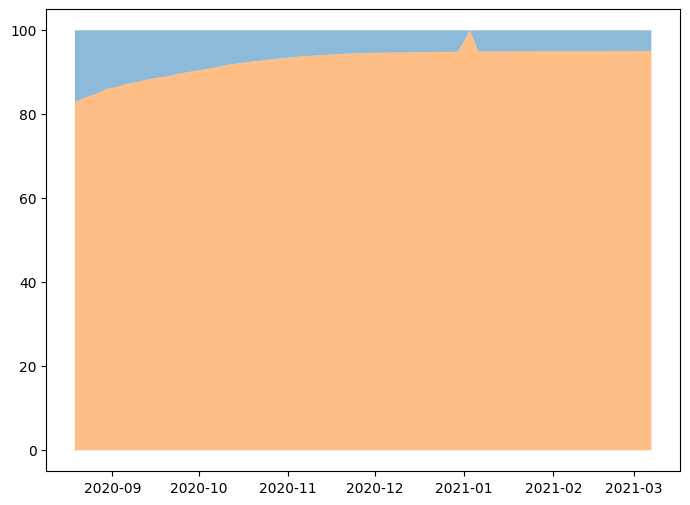

In [16]:
for i in range(len(estados)):
    grafica(i)

# Grafica en barra de los estados más destacados

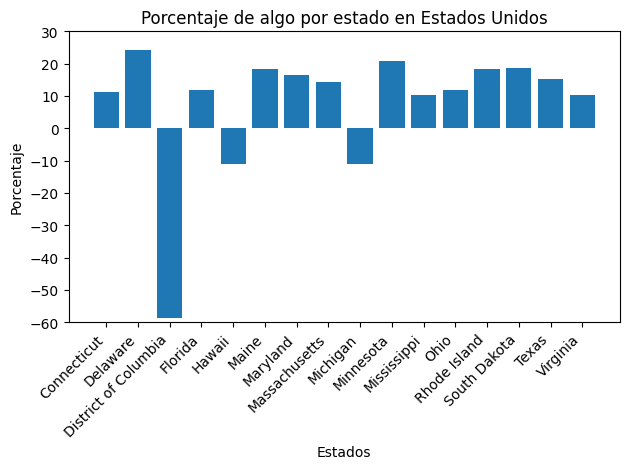

In [ ]:
# Datos
nombres = [
    'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Hawaii',
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Ohio', 'Rhode Island', 'South Dakota', 'Texas', 'Virginia'
]
porcentajes = [
    11.13, 24.32, -58.83, 11.99, -10.95,
    18.40, 16.50, 14.38, -11.05, 20.75,
    10.29, 11.77, 18.30, 18.56, 15.37, 10.26
]

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar barras
ax.bar(nombres, porcentajes)

# Establecer límites en el eje Y
ax.set_ylim(-60, 30)

# Etiquetas y título
ax.set_xlabel('Estados')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de algo por estado en Estados Unidos')

# Rotar etiquetas en el eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar gráfico
plt.tight_layout()

plt.savefig("Porcentaje_USA.png")
plt.show()

